<div style="border:solid Chocolate 2px; padding: 40px">

<b> Лиза, привет!👋</b>

Меня зовут Алексей Гриб, и я буду ревьюером твоего проекта. 

Сразу хочу предложить в дальнейшем общаться на "ты" - надеюсь, так будет комфортнее:) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!
    
Цель ревью - не искать ошибки в твоём проекте, а помочь тебе сделать твою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому не расстраивайся, если что-то не получилось с первого раза - это нормально, и это поможет тебе вырасти!
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> похвала, рекомендации «со звёздочкой», полезные лайфхаки, которые сделают и без того красивое решение ещё более элегантным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> некритичные ошибки или развивающие рекомендации на будущее. 
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
Критичные ошибки, которые обязательно нужно исправить.
</div>

    
Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 
    
Ты также можешь задавать свои вопросы, реагировать на мои комментарии, делать пометки и пояснения - полная творческая свобода! Но маленькая просьба - пускай они будут отличаться от моих комментариев, это поможет избежать путаницы в нашем общении:)
Например, вот так:
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

*твой текст*
</div>
    
Давай посмотрим на твой проект!

# Проект 

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

**Цель проекта:** Разработать модели машинного обучения для предсказания уровня удовлетворенности сотрудника работой в компании и для прогнозирования факта увольнения сотрудника на основе предоставленных данных заказчика.

### План проекта 
[**Шаг 0. Импорт библиотек, методы**](#step_00)

[**Задача 1**](#task_01)

[**Шаг 1. Загрузка данных**](#step_01)

[**Шаг 2. Предобработка данных**](#step_02)

[**Шаг 3. Исследовательский анализ**](#step_03)

[**Шаг 4. Подготовка данных, обучение модели**](#step_04)

[**Задача 2**](#task_02)

[**Шаг 1. Загрузка данных**](#step_11)

[**Шаг 2. Предобработка данных**](#step_12)

[**Шаг 3. Исследовательский анализ**](#step_13)

[**Шаг 4. Подготовка данных, обучение модели**](#step_14)

[**Шаг 5. Подготовка данных, обучение модели**](#step_15)








<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошее вступление!
    
В нём есть всё, что необходимо, чтобы понять суть проекта с первых строк отчёта!

# Импорт библиотек и методы

<a id="step_00"></a>

In [89]:
! pip install shap

In [90]:
! pip install phik

In [91]:
#импорт нужных библиотек
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

from sklearn.compose import ColumnTransformer
from sklearn.impute import  SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,  RobustScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.preprocessing import QuantileTransformer
import warnings
import phik
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')



RANDOM_STATE = 42

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Библиотеки импортировали - отлично!

In [92]:
def duplicates(columns, df):
    for column in columns:
        unique_values = df[column].unique()
        print(f'Уникальные значения в колонке {column}: {unique_values}')

In [93]:
def create_histogram(data, column):
    """
    Input:
    - data: Датафрейм, содержащий данные.
    - column: Наименование столбца, для которого нужно построить гистограмму.
    - title: Заголовок гистограммы.
    - bins: Количество бинов для гистограммы (по умолчанию 50)

    Output:
    - None

    Description:
    Функция создает гистограмму для указанного столбца в датафрейме при помощи библиотеки seaborn. 
    Результат выводится на экран.
    """
    plt.figure(figsize=(12, 6))
    sns.set()
    num_bins = int(np.ceil(np.sqrt(len(data[column]))))
    sns.histplot(data=data, x=column, kde=True, bins=num_bins)
    plt.title(f'{column} - Частота распределения', fontsize=18)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.show()

In [94]:
def create_barplot(data, column, rotation=45):
    """
    Input:
    - data (DataFrame): Исходный DataFrame с данными.
    - column (str): Название колонки, для которой нужно построить диаграмму.
    - title (str): Заголовок для столбчатой диаграммы.
    
    Output:
    None

    Description:
    Функция создает столбчатую диаграмму на основе данных из указанной колонки.
    """
    plt.figure(figsize=(10, 6))
    plt.xticks(rotation=rotation)
    new_data = data[column].value_counts()
    df_new_data = new_data.reset_index()
    df_new_data.columns = [column, 'count']

    sns.barplot(x=column, y='count', data = df_new_data)
    plt.title(f'{column}.Частота распределения')
    plt.xlabel(f'{column}')
    plt.ylabel(f'количество {column}')

In [95]:
def cat_num_col(df):
    """
    Input:
    - df(DataDrame): Исходный DataFrame с данными
    Output:
    - num_col_names(list) - список столбцов с количественными признаками
    - cat_col_names(list) - список столбцов с категориальными признаками

    Description:
    Функция возвращает списки с названиями столбцов категориальных и количественных признаков. id из списка удаляется

    """
    num_col_names = list(df.select_dtypes(include=['int64', 'float64']).columns)
    cat_col_names = list(df.select_dtypes(include=['object']).columns)
    num_col_names.remove('id')
    return num_col_names, cat_col_names

In [96]:
def shapiro_test(data, column):
    """
    Функция выполняет тест Шапиро-Уилка на нормальность данных в указанном столбце.

    Параметры:
        - data: pandas DataFrame, входные данные
        - column: str, название столбца, для которого выполняется тест

    Вывод:
        - печать результата теста Шапиро-Уилка, включая статистику теста и p-значение
        - вывод сообщения о том, является ли распределение данных нормальным
    """ 
    statistic, p_value = shapiro(data[column])

    # Печать результата теста
    alpha = 0.05  # Уровень значимости
    print(f'Результат теста Шапиро-Уилка для столбца {column}:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}')
    if p_value > alpha:
        print('Распределение данных является нормальным.')
    else:
        print('Распределение данных не является нормальным.')

In [97]:
def create_boxplot(data, column):
    """
    Input:
    - data (DataFrame): Исходный DataFrame с данными.
    - column (str): Название колонки, которая будет отображена на оси x.
    
    Output:
    None
    
    Description:
    Функция создает график ящика с усами на основе указанных столбцов.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Ящик с усами для {column}')
    plt.xlabel(column)
    plt.show()

In [98]:
def compare_df(df1, df2, column):
    # Создание сабплотов
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Первый график - барплот количества сотрудников в каждом департаменте
    sns.countplot(x=column, data=df1, ax=ax[0], palette='Set1')
    ax[0].set_title('Сотрудики, которые не уволились')

    # Второй график - барплот количества уволившихся сотрудников в каждом департаменте
    sns.countplot(x=column, data=df2, ax=ax[1], palette='Set2')
    ax[1].set_title('Сотрудики, которые уволились')

    plt.show()

In [99]:
def plot_phik_heatmap(dataframe, interval_cols):
    """
    Input:
    - dataframe (DataFrame): Исходный DataFrame с данными.
    - interval_cols (list): Список названий интервальных признаков для расчета phik.
    
    Output:
    None
    
    Description:
    Эта функция вычисляет матрицу корреляций на основе phik для указанных интервальных признаков и строит тепловую карту на основе этой матрицы с использованием библиотеки seaborn.
    """
    # Вычисление phik_matrix
    phik_matrix = dataframe.phik_matrix(interval_cols=interval_cols)

    # Использование цветовой карты RdYlBu для лучшей визуализации
    cmap = sns.diverging_palette(220, 20, as_cmap=True)

    # Создание тепловой карты на основе phik_matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(phik_matrix, annot=True, cmap=cmap, center=0, square=True, linewidths=.5)
    plt.title('Phik. Тепловая карта')
    plt.show()


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что задаёшь функции в начале проекта, а также оставляешь для них пояснения.

# Задача 1 

<a id="task_01"></a>

# Этап 1. Загрузка данных

<a id="step_01"></a>

In [100]:
try:
    df_train_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    df_test_features = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    df_test_target_job_satisfaction_rate = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
except FileNotFoundError:
    print('Упc, кажется такого файла нет')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные загрузили - отлично!
    
Здорово, что ты используешь конструкцию ``try-except`` для путей файлов. Но еще лучше использовать библиотеку `os` - её использование позволит тебе проверять существование указанных директорий (что может быть актуально при одновременной работа на локальном и сетевом окружении) и загружать данные из существующей директории, избегая ошибок. Как пример:
    
    import os

    pth1 = '/folder_1/data.csv'
    pth2 = '/folder_2/data.csv'
    
    if os.path.exists(pth1):
        query_1 = pd.read_csv(pth1)
    elif os.path.exists(pth2):
        query_1 = pd.read_csv(pth2)
    else:
        print('Something is wrong')
    
Ещё на этапе считывания данных можно спарсить дату: за это действие отвечает параметр `parse_dates` метода `read_csv()`, в него нужно передать список с названием полей-дат, и в большинстве случаев дата будет корректно преобразована в нужный формат сразу:)
Также на этапе считывания данных задать индекс-столбец- за это действие отвечает параметр `index_col`.

исследуем df_train_job_satisfaction_rate

In [101]:
df_train_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [102]:
df_train_job_satisfaction_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Тренировочные данные содержат 4000 строк, 10 колонок. В файле следующие столбцы 
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


Изучим df_test_features

In [103]:
df_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Здесь уже 2000 данных и 9 колонок, так как нет целевого признака 

In [104]:
df_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Изучим df_test_target_job_satisfaction_rate

In [105]:
df_test_target_job_satisfaction_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [106]:
df_test_target_job_satisfaction_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Датасет содержит 2000 стро. Содержится информация о удволетворенности сотрудника и его id

## Вывод 
В качестве данных у нас 3 датафрейма. Тренирочая выборка, признаки тестовой выборки и целевой признак тестовой выборки. Все типы данных соотвествуют тем, что были даны в описании к названиям колонок.  В датафреймах df_test_features и df_train_job_satisfaction_rate есть пропуски 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Первичный осмотр выполнили.

# Этап 2 Предобработка данных

<a id="step_02"></a>

Проверим наличие дубликатов и не явных дубликатов. При необходимостии удалим дубли 

In [107]:
data_frames = [df_test_target_job_satisfaction_rate, df_test_features, df_train_job_satisfaction_rate]

for data in data_frames:
    data_name = [key for key, value in locals().items() if value is data][0]
    print(f'Количество дубликатов в датафрейме {data_name}: {data.duplicated().sum()}')
    if data.duplicated().sum() > 0:
        data.drop_duplicates(inplace=True)
        print(f'Количество дубликатов в датафрейме {data_name}: {data.duplicated().sum()}')

Количество дубликатов в датафрейме df_test_target_job_satisfaction_rate: 0
Количество дубликатов в датафрейме df_test_features: 0
Количество дубликатов в датафрейме df_train_job_satisfaction_rate: 0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Явных дубликатов нет.

In [108]:
num_col_train_job, cat_col_train_job = cat_num_col(df_train_job_satisfaction_rate)
num_col_test_features, cat_col_test_features = cat_num_col(df_test_features)

In [109]:
print('df_train_job_satisfaction_rate')
for col_name in cat_col_train_job:
    print(f'Количество уникальны значений в столбце {col_name}: {df_train_job_satisfaction_rate[col_name].unique()}')
print()
print('df_test_features')
for col_name in cat_col_test_features:
    print(f'Количество уникальны значений в столбце {col_name}: {df_test_features[col_name].unique()}')
    



df_train_job_satisfaction_rate
Количество уникальны значений в столбце dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Количество уникальны значений в столбце level: ['junior' 'middle' 'sinior' nan]
Количество уникальны значений в столбце workload: ['medium' 'high' 'low']
Количество уникальны значений в столбце last_year_promo: ['no' 'yes']
Количество уникальны значений в столбце last_year_violations: ['no' 'yes']

df_test_features
Количество уникальны значений в столбце dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Количество уникальны значений в столбце level: ['junior' 'middle' 'sinior' nan]
Количество уникальны значений в столбце workload: ['medium' 'low' 'high' ' ']
Количество уникальны значений в столбце last_year_promo: ['no' 'yes']
Количество уникальны значений в столбце last_year_violations: ['no' 'yes']


В столбцах  workload и dept датафрейма df_test_features есть пустые строки. Их заменим на nan для последующей обработки 

In [110]:
df_test_features['dept'].replace(' ', np.nan, inplace=True)
df_test_features['workload'].replace(' ', np.nan, inplace=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Молодец, что заметила неявные пропуски в `test` выборке.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> 

Также можно было бы исправить `sinior` на `senior`.

На предыдущем этапе были обнаружены пропуски

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Предобработка выполнена.

## Вывод 
В датафремах нет дубликатов. Пустые строки заменили на nan, пропуски обработаем в пайплайне. 

# Этап 3 Исследовательский анализ данных

In [111]:
num_col_train_job = ['salary','job_satisfaction_rate']

<a id="step_03"></a>

Выведем графики для всех признаков

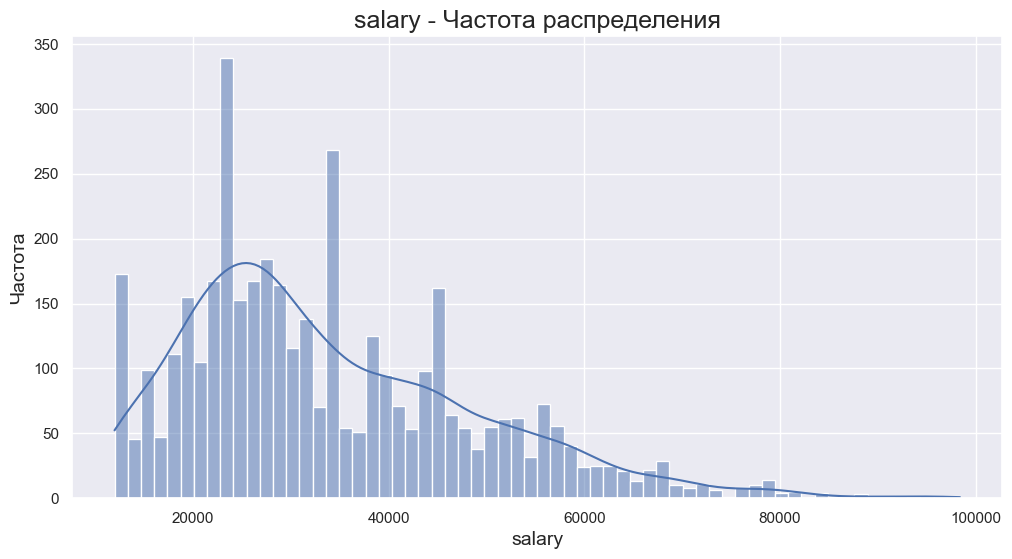

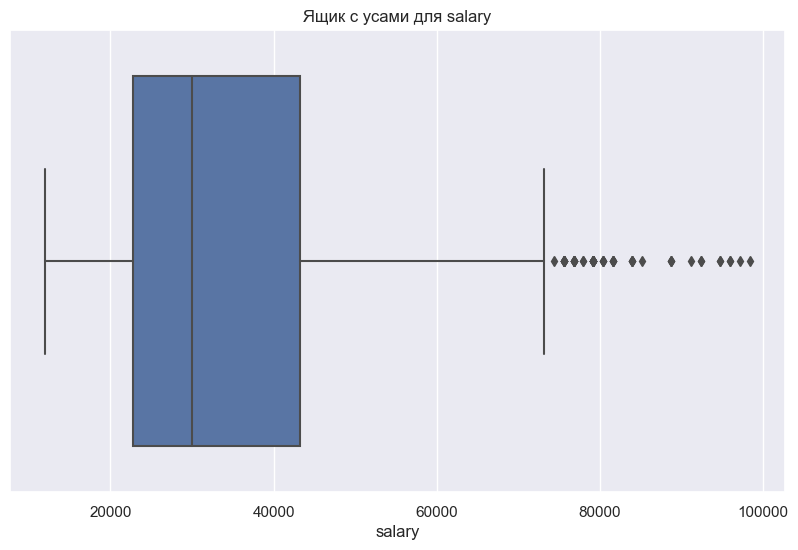

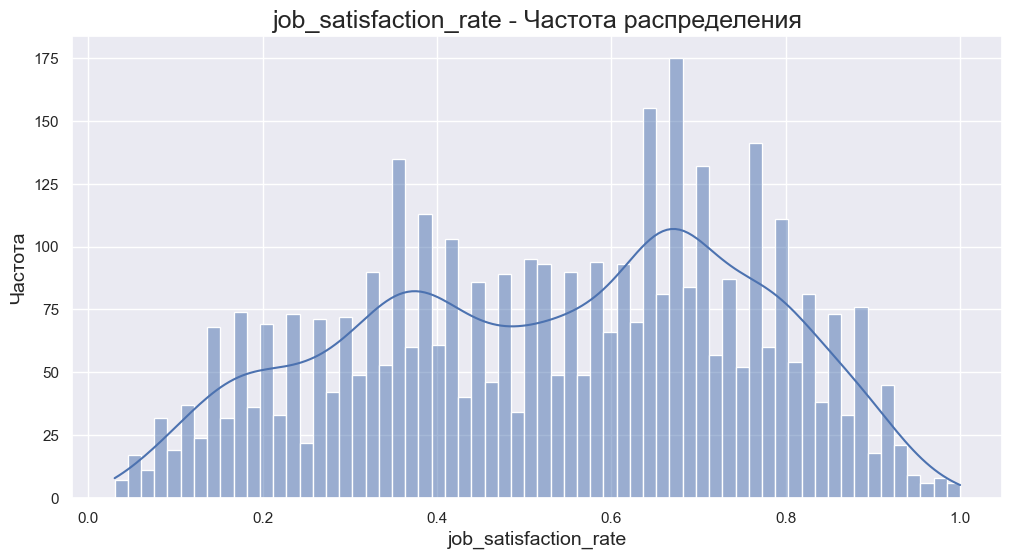

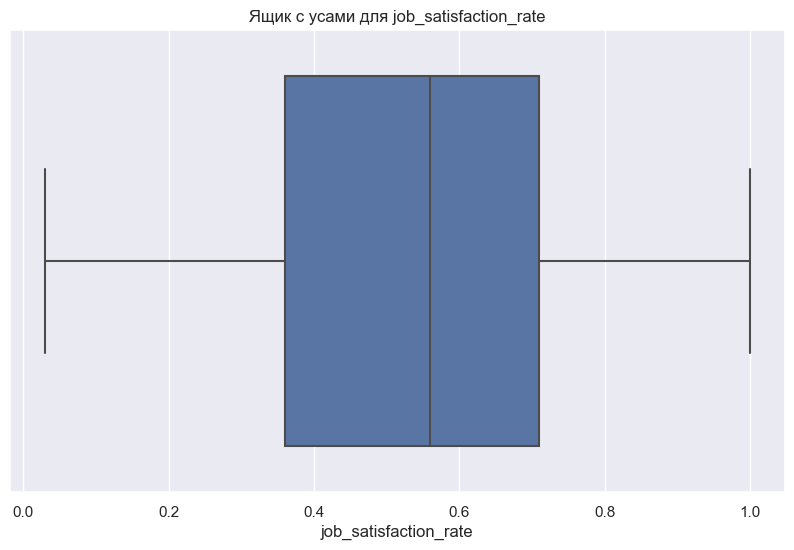

In [112]:
for num_col in num_col_train_job:
    create_histogram(df_train_job_satisfaction_rate, num_col)
    create_boxplot(df_train_job_satisfaction_rate, num_col)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. `employment_years` и `supervisor_evaluation` - дискретные признаки, для их анализа нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать `sns.countplot` или `plot(kind='bar')`.
    
2. На гистограммах ось Y не соответствует типу графика - при использовании обычной гистограммы у нас частота распределения, а не плотность.

In [113]:
cat_col_train_job = ['dept', 'level', 'workload', 
                     'last_year_promo', 'last_year_violations', 'employment_years', 'supervisor_evaluation' ]


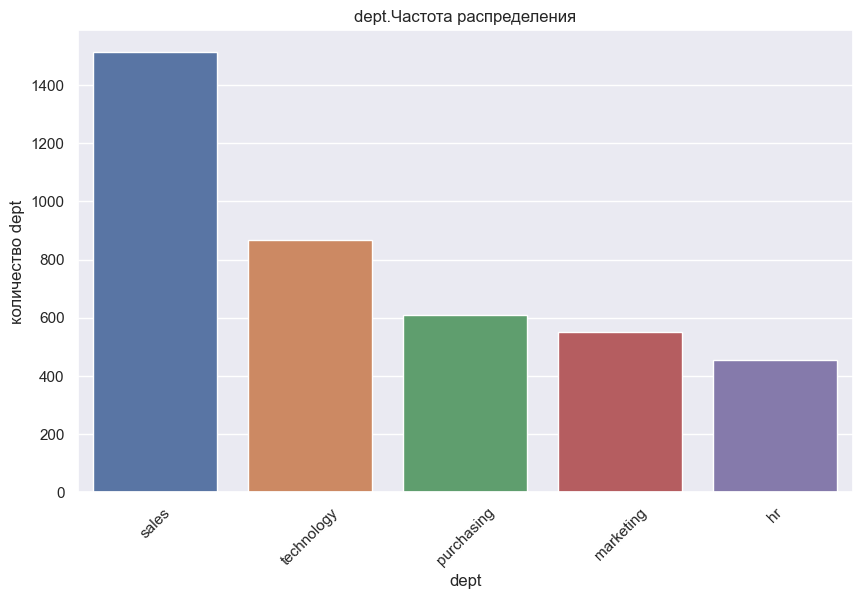

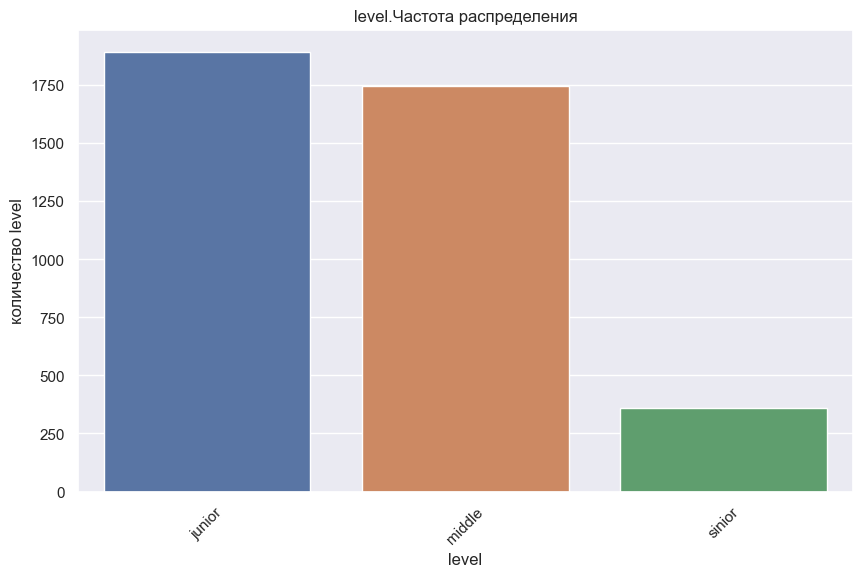

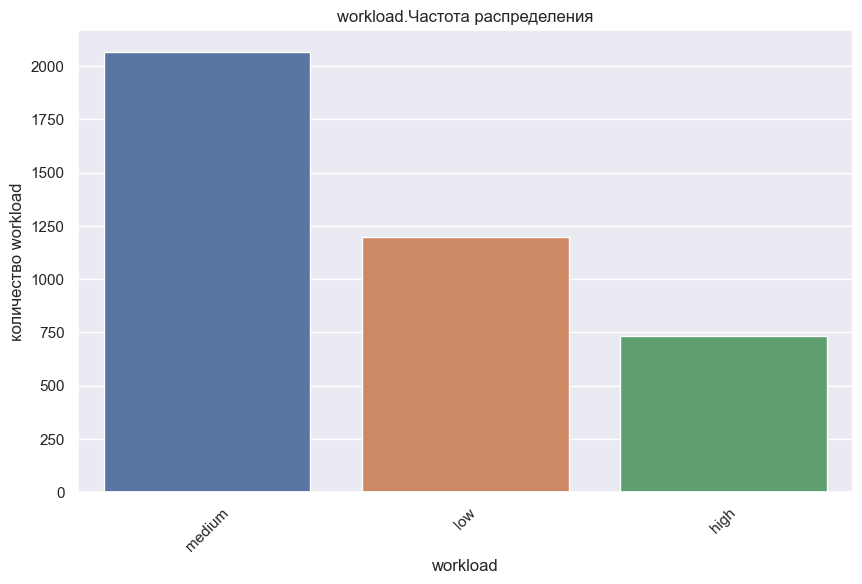

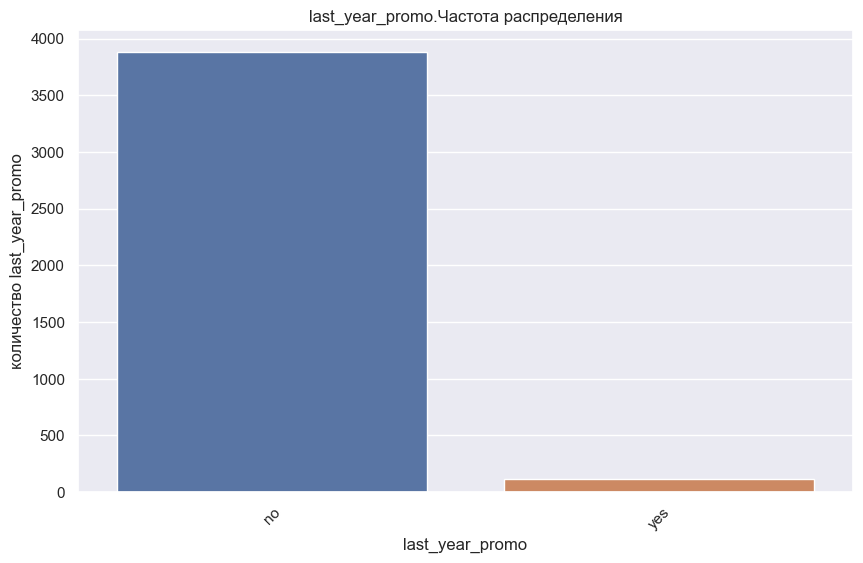

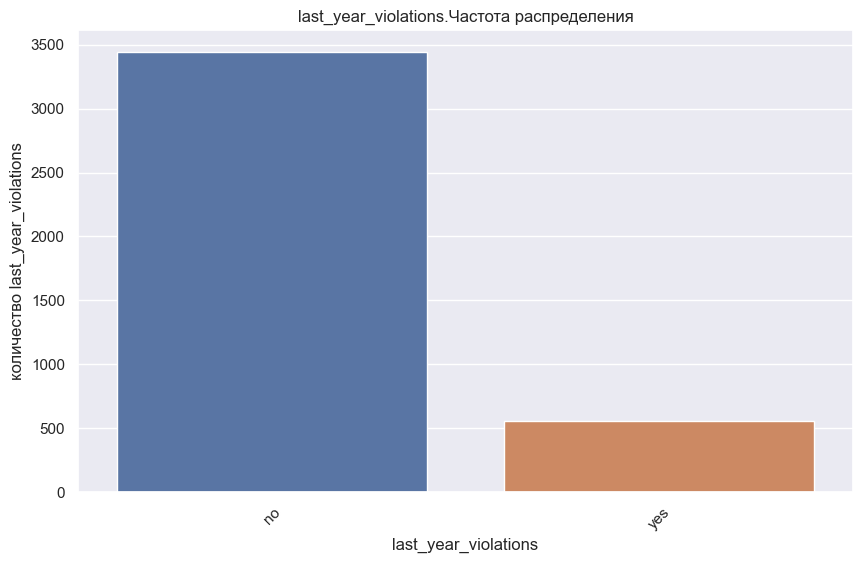

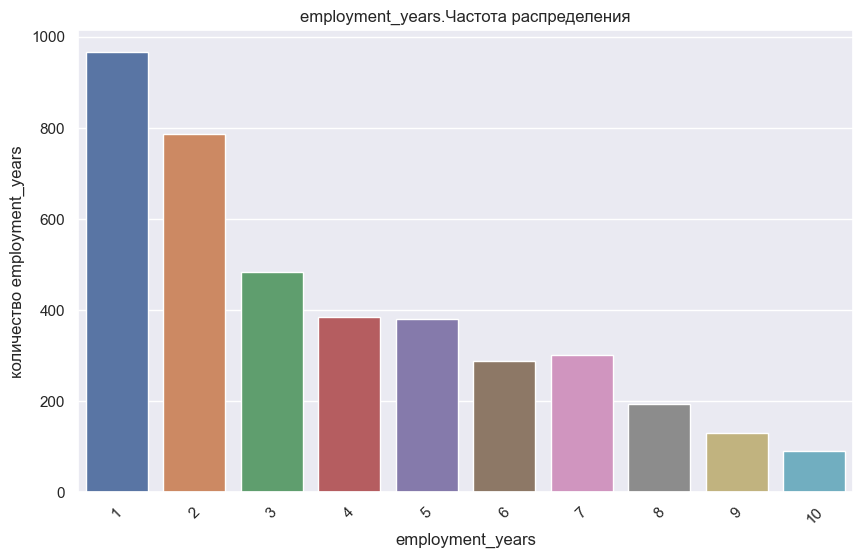

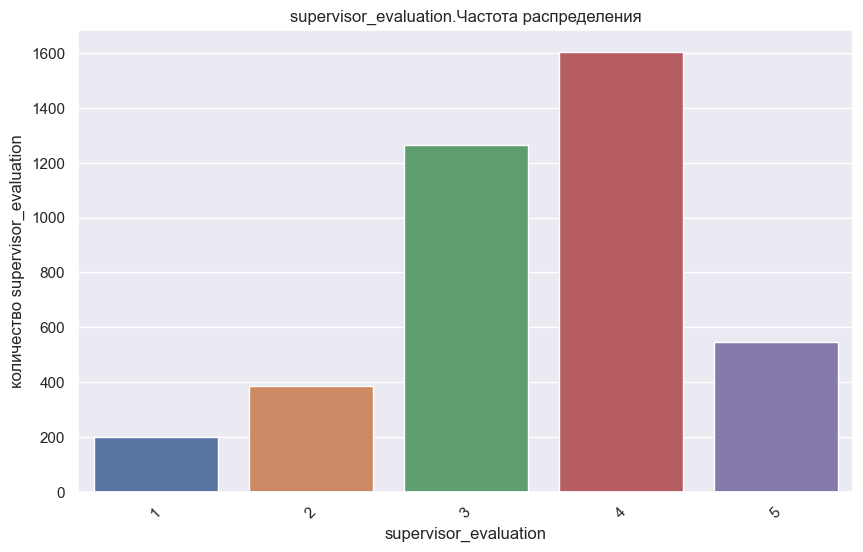

In [114]:
for cat_col in cat_col_train_job:
    create_barplot(df_train_job_satisfaction_rate, cat_col)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Тут аналогично не плотность распределения.

В данных df_train_job_satisfaction_rate есть выбросы в зарплате и оценка качества работы сотрудника, которую дал руководитель. Так как это сотрудники и для модели будет лучше уметь обрабатывать такие выбросы чем не уметь - мы оставим выбросы, но будем использовать скалер, который устойчив к выбросам. 
У тренировочных данных разброс зарлаты от 0 до 10 лет, оценка качества работы сотрудника, которую дал руководитель от 1 до 5, больше всего 4.0, зарпалата имеет большой разброс, 10_000 - 100_00 рублей. Удволетворенность работы от 0 и до 1, распределение волнообразное, 2 горба. БОльший горб находится в районе 0.8 баллов. 
Больше всего сотрудников из отдела продаж, меньше из hr. В компании больше всего джунов, меньше синьоров, у большинства средняя загруженность. У большинства не было повышения в последний год и не было нарушего трудового договора. 

In [115]:
num_col_test_features = ['salary']

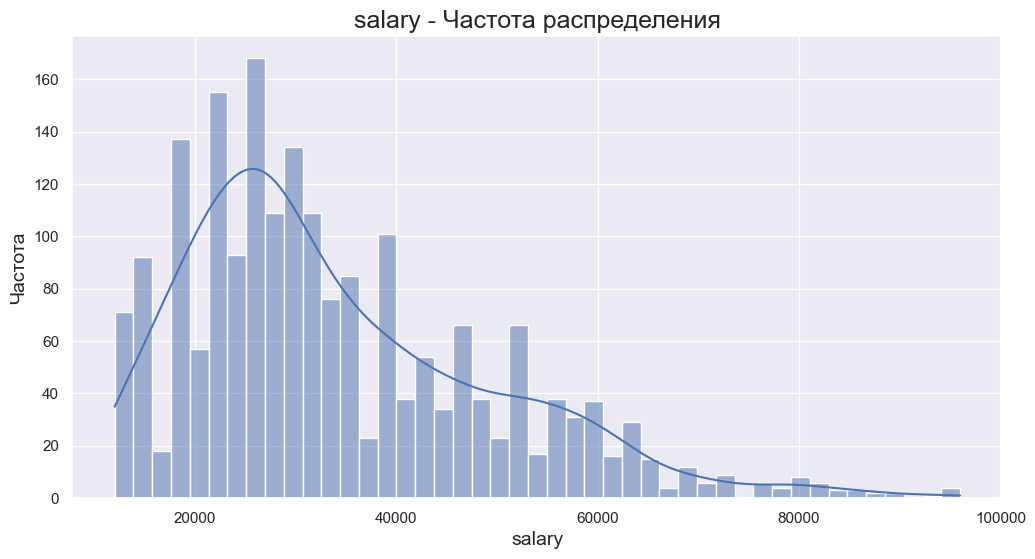

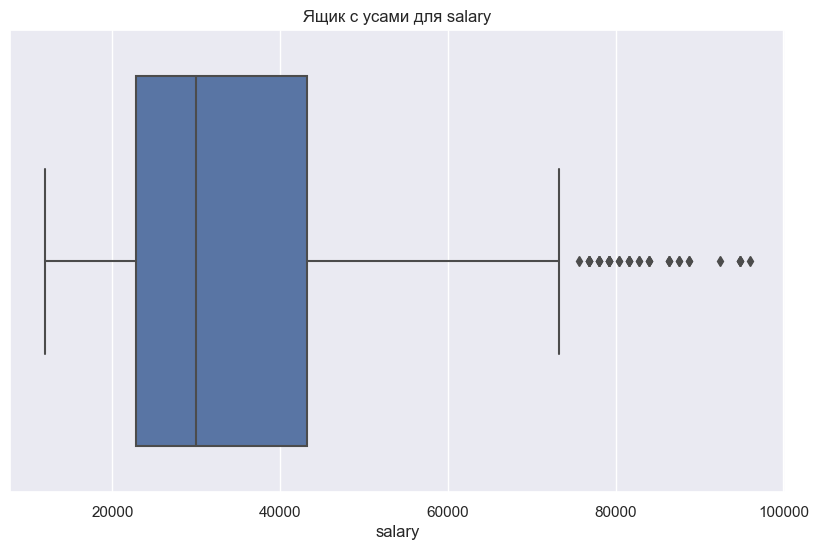

In [116]:
for num_col in num_col_test_features:
    create_histogram(df_test_features, num_col)
    create_boxplot(df_test_features, num_col)

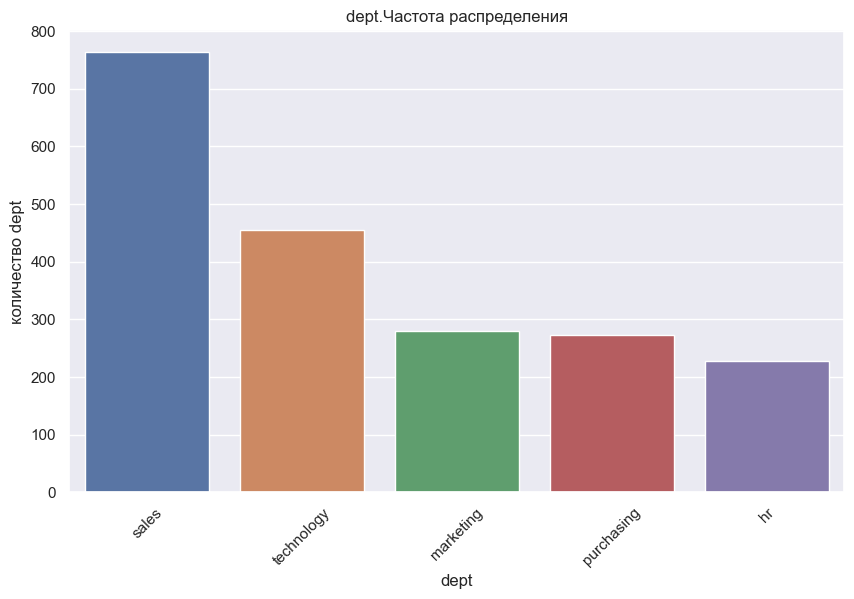

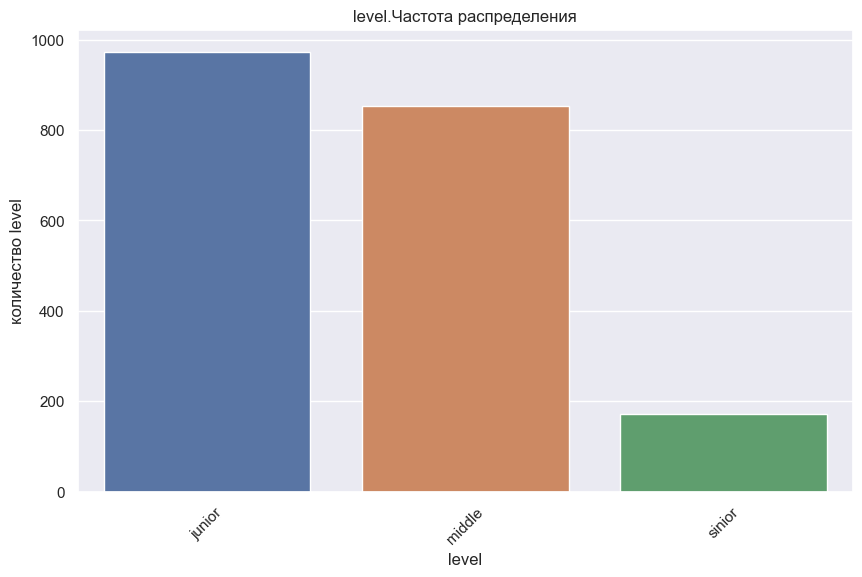

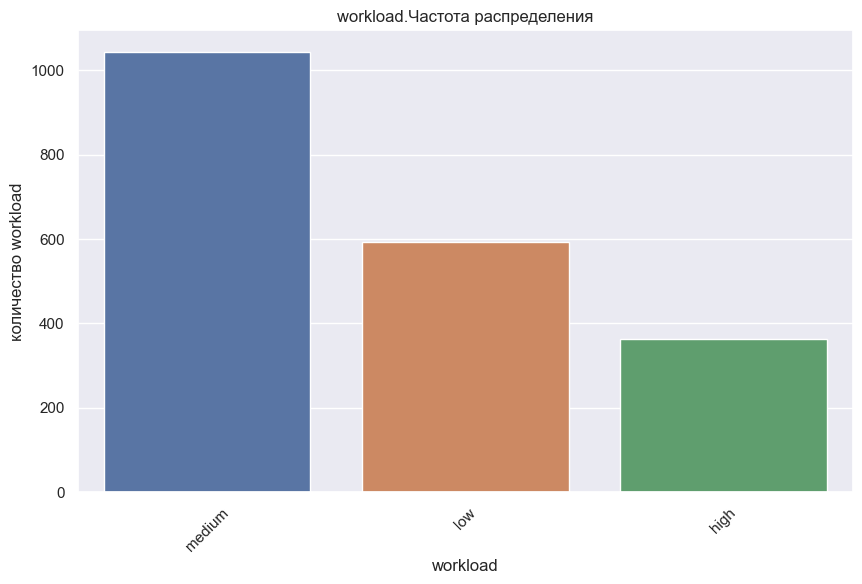

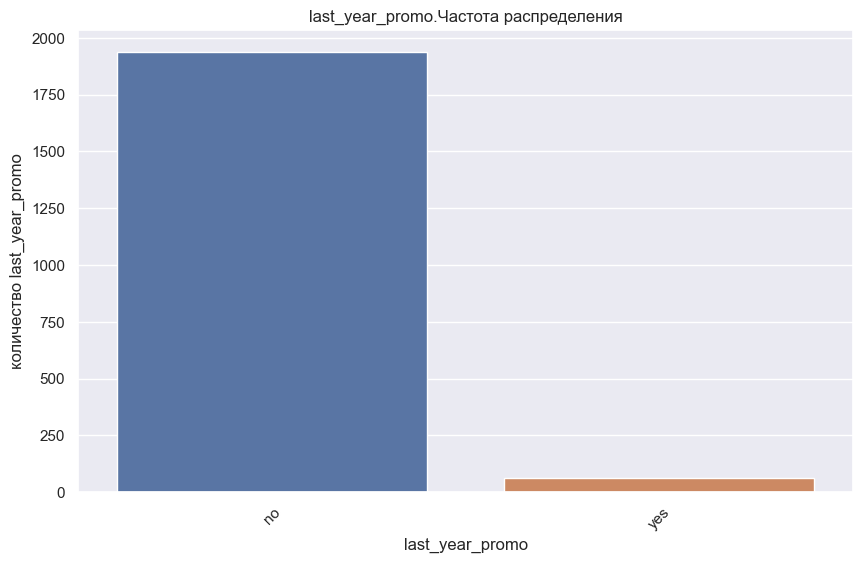

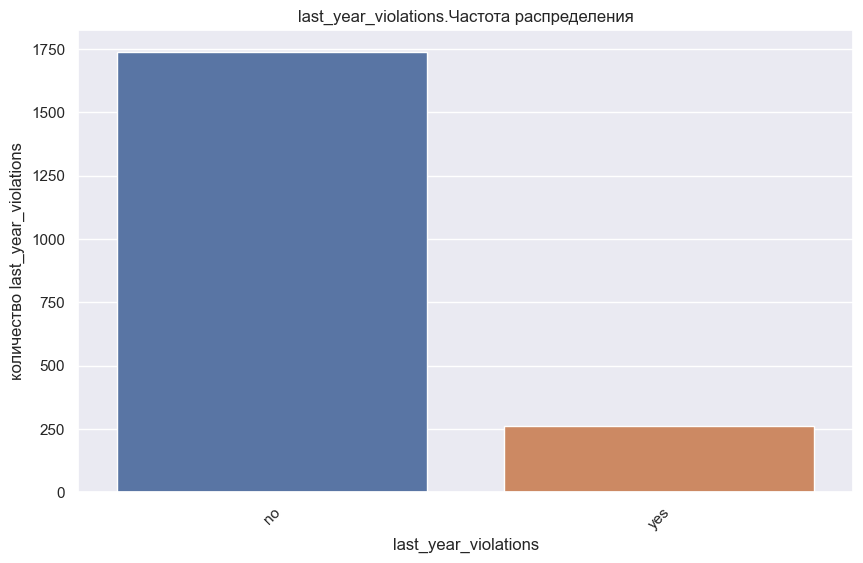

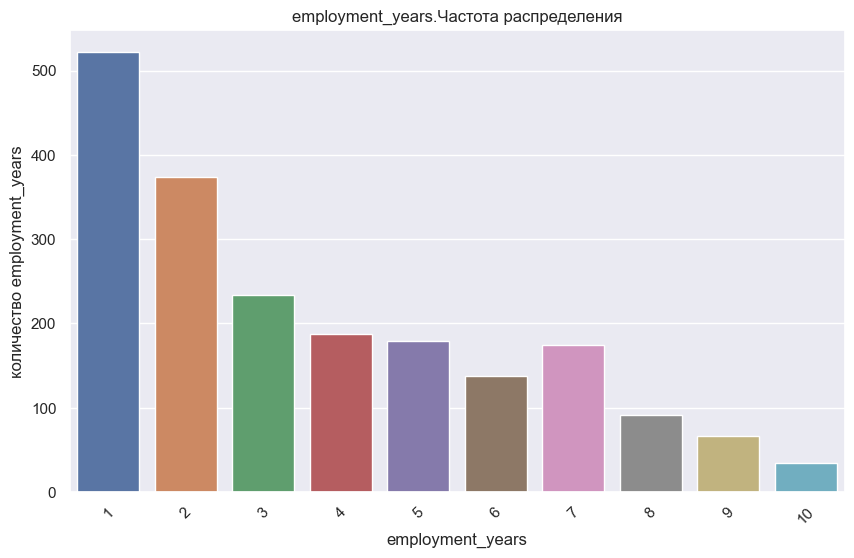

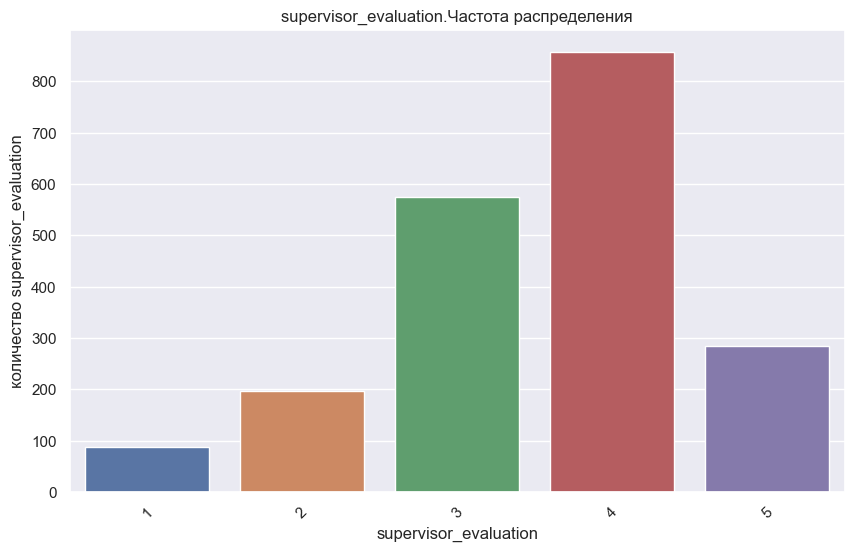

In [117]:
for cat_col in cat_col_train_job:
    create_barplot(df_test_features, cat_col)

В тестовых данных примерно такая же картина, как и у в тренировочных

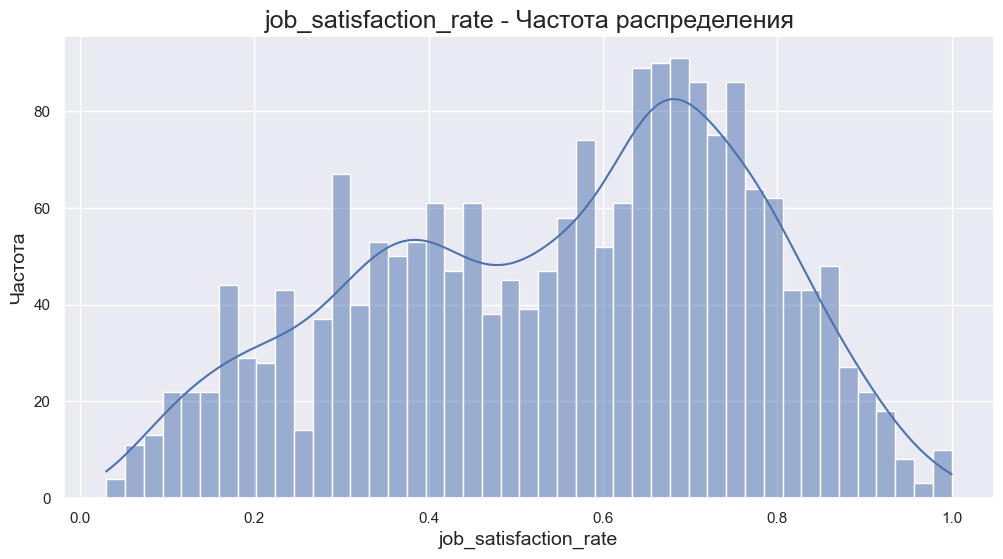

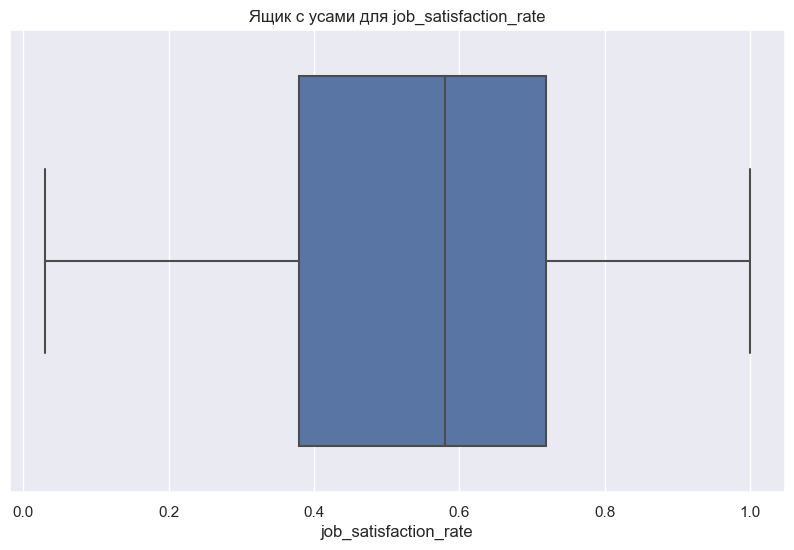

In [118]:
create_histogram(df_test_target_job_satisfaction_rate, 
                 'job_satisfaction_rate')

create_boxplot(df_test_target_job_satisfaction_rate, 
                 'job_satisfaction_rate')

В тестовом целевом признаке есть 2 горба, бОльший горб в районе 0.8 баллов

**Анализ корреляции**

/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for t

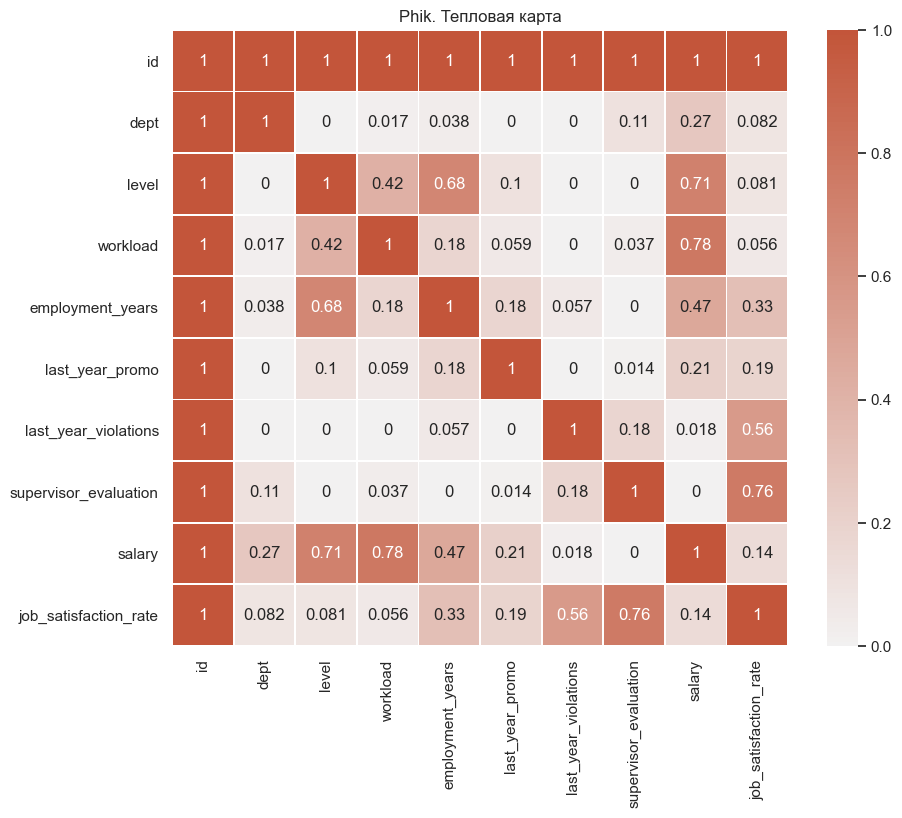

In [119]:
# Выбор интервальных признаков
interval_cols = ['salary', 'job_satisfaction_rate']
plot_phik_heatmap(df_train_job_satisfaction_rate, interval_cols)


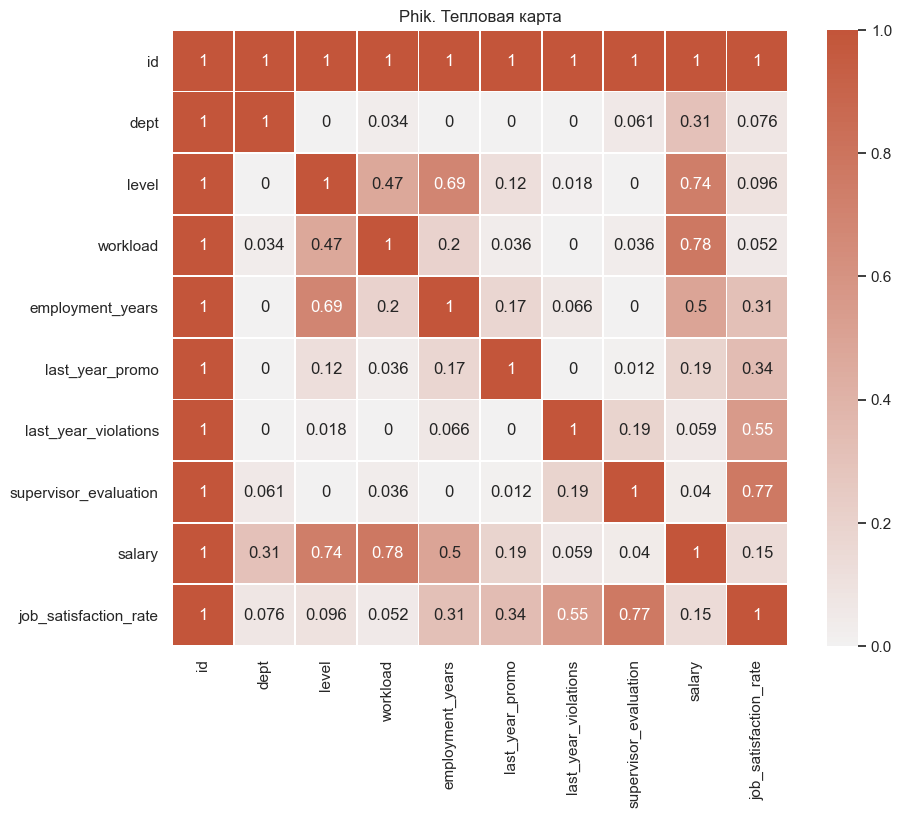

In [120]:
df_test_combined = df_test_features.merge(df_test_target_job_satisfaction_rate, on='id')
plot_phik_heatmap(df_test_combined, interval_cols)



<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Не хватает анализа корреляции `train` и `test` выборок. 
    
Матрица корреляций Пирсона не подходит для анализа датасетов, в которых присутствуют категориальные или дискретные признаки - по ним корреляций Пирсона не может быть оценена вообще (в случае категориальных) или не может быть оценена корректно (в случае дискретных).

Хорошим решением будет использование матрицы `phik` - она анализирует корреляцию между признаками любого типа и не требует предварительного кодирования. При использовании `phik` крайне важно настроить параметр `interval_cols`, передав ему список с названиями непрерывных признаков: если этого не сделать, библиотека своими силами будет пытаться разнести признаки по типам, и она часто делает в этом ошибки - от этого в свою очередь мы получаем некорректную оценку корреляций, так как от типа признака зависит метод оценки корреляции.
    
Познакомиться с этой корреляцией можно тут: на английском: https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7, на русском: https://dzen.ru/a/ZEtcuc4K2RX_Jstr?utm_referer=www.google.com.

## Вывод
В датафрейме df_train_job_satisfaction_rate в столбцах supervisor_evaluation и salary есть выбросы. Это не удивительно, так как сеньоров, как показали данные, в меньшинстве. И эта зарплата принадлежит топовым специлистам. Если мы удалим эти выбросы - модель может недообучиться, поэтому выбросы оставим, но будем использовать скалер, который более устойчив к выбросам. 

При анализе корреляции как тестовых, так и тренировочных данных, видна сильная положительная связь между уровнем зарплаты и уровнем работника, а также загруженностью и зарплатой. Но корреляция еще недостаточно высокая, чтобы назвать мультискорингом. 
Также есть сильная положительная корреляция между удволетворенностью сотрудников и оценкой от работодателя

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Выполнили EDA признаков.

# Этап 4 Подготовка данных, создание модели

<a id="step_04"></a>

создаем списки колонок для двух кодировщиков 

In [121]:
ord_cols = ['level', 'workload']
ohe_cols = ['dept']
label_cols = ['last_year_promo', 'last_year_violations']
ohe_cols += label_cols

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> `last_year_promo` и `last_year_violations` не являются упорядоченными признаками.

тренировочные данные делим на признаки и целевой признак 

Так как данные в датафреймах тестовых данных перемешаны - отсортируем их по id, чтобы в дальнейшем не возникло ошибок 

In [122]:
df_test_features = df_test_features.set_index('id')
df_test_target_job_satisfaction_rate = df_test_target_job_satisfaction_rate.set_index('id')

df_test_combined =  pd.merge(df_test_features, df_test_target_job_satisfaction_rate, 
                             left_index=True, right_index=True)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Добавили целевой признак в `test` по `id` - отлично!

In [123]:
print(f'количество дубликатов:{df_test_combined.duplicated().sum()}')
print()
print(f'количество пропусков:\n{df_test_combined.isna().sum()}')
print()
print(f'размерность датафрейма: {df_test_combined.shape}')

количество дубликатов:83

количество пропусков:
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

размерность датафрейма: (2000, 9)


In [124]:
train_target = df_train_job_satisfaction_rate['job_satisfaction_rate']
df_test_combined_target = df_test_combined['job_satisfaction_rate']
df_test_combined_features =  df_test_combined.drop('job_satisfaction_rate', axis=1)
df_train_job_drop_id = df_train_job_satisfaction_rate.drop('job_satisfaction_rate', axis=1)

In [125]:
df_train_job_drop_id.duplicated().sum()

0

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
1. Из выборок с признаками не удалён `id`.
    
2. После удаления `id` нужно проверить наличие новых дубликатов в данных: так как мы удалили часть лишних признаков, у нас могут появиться новые явные дубликаты: чем меньше признаков остаётся, тем выше шанс, что значения остальных признаков будут пересекаться. При этом ценности для модели такие наблюдения уже не принесут, поэтому стоит проверить дубликаты также в финальной версии таблицы. При этом важно проверить только `train`: наличие дубликатов в `test` нам никак не мешает, но это правильное решение с точки зрения неприкосновенности `test`, ведь реальный поток данных (который имитирует `test` выборка) мы исправить не сможем. А вот наличие дубликатов в `train` не только не принесёт пользы модели, но может и навредить.

После объединения таблиц дубликатов и пропусков больше не стало. Пропуски заменим на часто встречающееся значение, в качестве скалера будем использовать RobustScaler(), так как он устойчив к выбросам. Возьмем 2 кодировщика OneHotEncoder() и OneHotEncoder() для того, чтобы сохранить уровни значимости. 

В качестве моделей будем использовать DecisionTreeRegressor, LogisticRegression, LinearRegression

Для оценки качества моделей будем использовать метрику SMAPE, функцию для нее напишем самостоятельно. Критерий успеха SMAPE <= 15

In [126]:
#обрабатываем качественные признаки OneHotEncoder
ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
])

label_pipe = Pipeline([
    ('simpleImputer_label', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', LabelEncoder())
])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
`OneHotEncoder` стоит настроить на работу с новыми значениями в категориальных признаках - сейчас энкодер выкинет ошибку, и модель не будет работать.

In [127]:
#обрабатываем качественные признаки OrdinalEncoder
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'senior'], 
                                       ['low', 'medium', 'high'], 
                                       ],
                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

#обрабатываем количественные признаки RobustScaler
numeric_pipe = Pipeline(steps=[
    ('scaler', RobustScaler())
])

# определение ColumnTransformer
data_preprocessor = ColumnTransformer(transformers=[
    ('ohe', ohe_pipe, ohe_cols),
    ('ord', ord_pipe, ord_cols),
    ('num', numeric_pipe, num_col_test_features),
    #('label', label_pipe, label_cols)
], remainder='passthrough')

# создание основного пайплайна
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 

In [128]:
#создание сетки моделей
param_grid = [
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 250),
     'models__max_features': range(2,50),
     'models__min_samples_leaf': range(1,5),
     'models__min_samples_split': range(2,20)
    },

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
    },
    {
        'models': [LinearRegression()] 
    },
]

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Для гиперпараметра `max_depth` рассматривается очень длинная последовательность: деревья с большой глубиной склонны к переобучению, а обучаются и предсказывают результат они дольше, поэтому делать их слишком глубокими не стоит - оптимальное значение почти всегда лежит в диапазоне от 2 до 5-6. Кроме того, можно попробовать значение `None` - в итоге оптимальная последовательность может выглядеть как `[None] + [i for i in range(2, 7)]`.
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> 
    
`LogisticRegression` является моделью классификации и не подходит для решения нашей задачи.

In [129]:
# определение функции SMAPE
def smape(y_test, pred): 
    metric = (100/len(y_test) * 
              np.sum(2 * np.abs(pred - y_test) / (np.abs(y_test) + np.abs(pred)))) * (-1)
    return metric

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть функция для оценки `sMAPE` - супер!
</div>

In [130]:
# создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=make_scorer(smape, greater_is_better=False),
    n_jobs=-1,
    random_state=RANDOM_STATE
    )

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Подскажи, пожалуйста, зачем 10 фолдов на кросс-валидации?

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Пользовательский скорринг `make_scorer` настроен неверно: так как метрика `sMAPE` применяется для задач регрессии, то она тем лучше, чем ниже - это нужно учитывать при создании скорринга для кросс-валидации, так как по умолчанию инструменты поиска оптимальных гиперпараметров и кросс-валидации вроде `cross_val_score` и `GridSearchCV` умеют только максимизировать метрику качества. Поэтому при создании скорринга с помощью `make_scorer` важно настроить параметр `greater_is_better=False`, чтобы оптимизируемая метрика минимизировалась, а не максимизировалась - таким образом задача максимизации будет решаться через задачу минимизации обратной функции.
    
Также при настройке этого параметра получаемая метрика будет отрицательной: это особеность работы `make_scorer` с настроенным параметром `greater_is_better=False`. Поэтому при выводе метрики на экран её стоит сделать положительной: взять по модулю, домножить на `-1` или просто указать `-` при выводе на экран, вроде `print(-a)`.
        
</div>

In [133]:
# подгонка модели
random_search.fit(df_train_job_drop_id, train_target)

# вывод лучшей модели и ее параметров
print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoder

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                              

/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoder

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Обрати внимание, что оценка получена на кросс-валидации, а не на `train` выборке - очень важно корректно разделять эти сущности.

In [134]:
pred = random_search.predict(df_test_combined_features)
score=make_scorer(smape,greater_is_better=False)
smape_score = score(random_search.best_estimator_, df_test_combined_features, df_test_combined_target)
print(f'Метрика SMAPE на тестовой выборке: {smape_score}')

ValueError: columns are missing: {'id'}

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Лучшую модель оценили на `test` - отличный результат!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b>
Очень важно также проверить лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу - вдруг окажется, что не было бы большого смысла заниматься созданием новых признаков, тюнингом и кросс-валидацией моделей, если можно было бы просто предсказывать среднее значение тренировочной выборки? 
    
В качестве константной модели можно использовать `DummyRegressor` (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) -  эта модель как раз создана для генерирования константных предсказаний.
    
Важно, чтобы результат тестирования нашей модели на тествой выборке был лучше, чем результат константной модели - в противном случае наша модель является бесполезной, так как все наши усилия над проектом не принесли результата, а можель, просто предсказывющая среднее на `train`, делает нашу работу лучше.

## Вывод
- Метрика SMAPE на тестовой выборке: 14.81 
- Лучшая модель с ее гиперпараметрами:
- DecisionTreeRegressor
- max_depth=40, max_features=10,min_samples_leaf=2, min_samples_split=12 random_state=42

Лучшей метрикой стало дерево решений. Хороший результат дерева решений может быть обоснован спецификой нашего набора данных. 
Деревья решений могут хорошо обрабатывать нелинейные отношения между переменными, а также способны автоматически преобразовывать и выбирать признаки для разделения, что может быть полезным в нашем наборе данных. Дерево решений более сильная модель чем логистическая и линейная регрессия, у этой модели больше внутренних настроек, которые можно изменять. 


<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть вывод по результатам машинного обучения.

# Задача 2

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> В части аналогичных активностей во второй задаче те же замечания, что и в первой задаче.

<a id="task_02"></a>

# Этап 1 Загрузка данных

<a id="step_11"></a>

In [ ]:
try:
    df_train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    df_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')
except FileNotFoundError:
    print()

In [ ]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [ ]:
df_train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [ ]:
df_test_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [ ]:
df_test_quit.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


## Вывод 
Для иследования увольнения сотрудника у нас есть 2 датафрейма. В одном находтся тренировочные данные, в другом таргетный признак тестовой выборки. Фичи тестовой выборки возьмем из прошлой задачи. Пропусков нет. Данные и типы данных такие же, как и в первой задаче, но целевой признак - увольение сотрудника 

# Этап 2. Предобработка данных

<a id="step_12"></a>

Изучим дубликаты

In [ ]:
df_train_quit.duplicated().sum()

0

In [ ]:
num_col_quit, cat_col_quit = cat_num_col(df_train_quit)

In [ ]:
duplicates(cat_col_quit, df_train_quit)

Уникальные значения в колонке dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уникальные значения в колонке level: ['middle' 'junior' 'sinior']
Уникальные значения в колонке workload: ['high' 'medium' 'low']
Уникальные значения в колонке last_year_promo: ['no' 'yes']
Уникальные значения в колонке last_year_violations: ['no' 'yes']
Уникальные значения в колонке quit: ['no' 'yes']


## Вывод 
Дубликатов не было обнаружено 

# Этап 3. Исследовательский анализ данных 


<a id="step_13"></a>

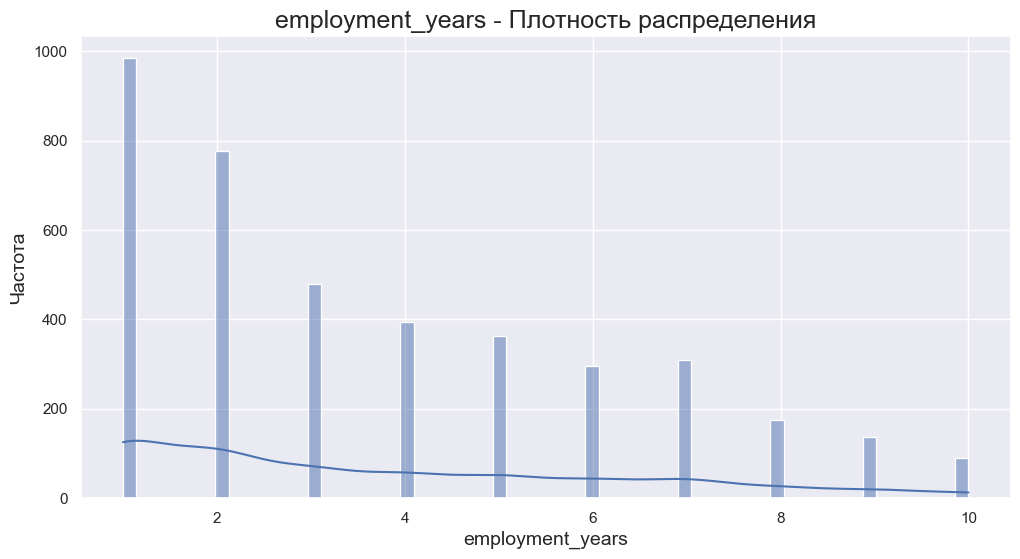

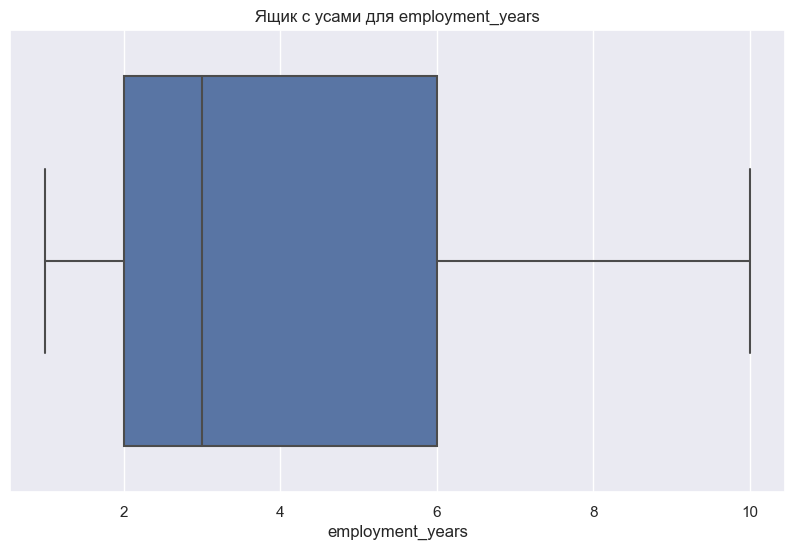

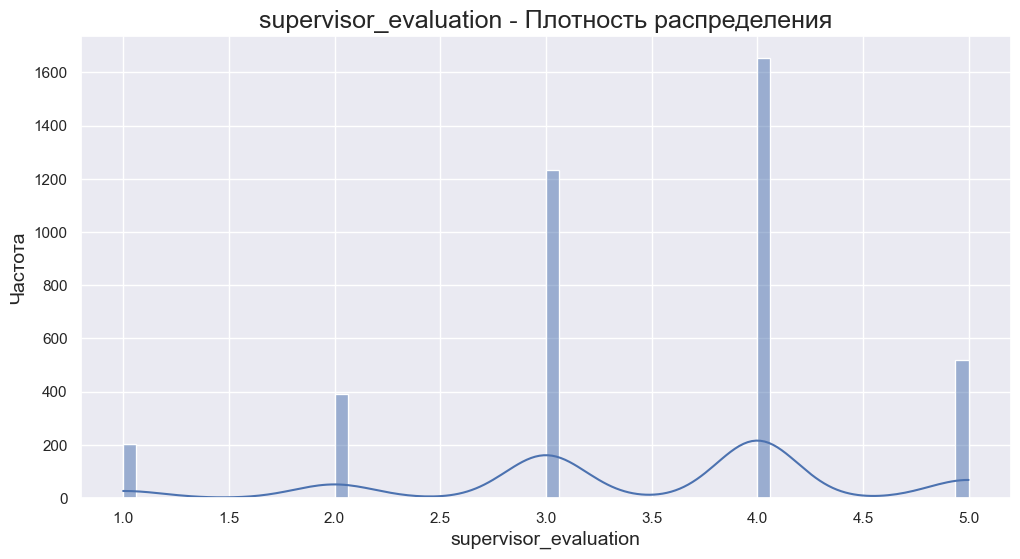

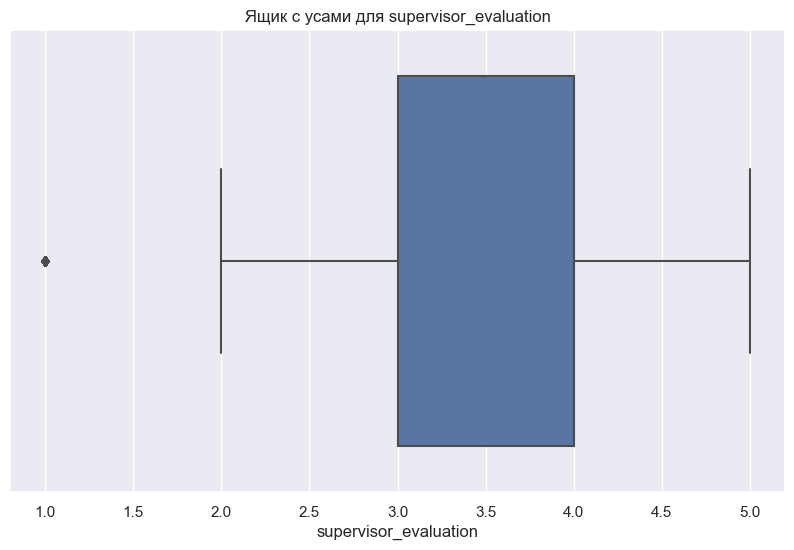

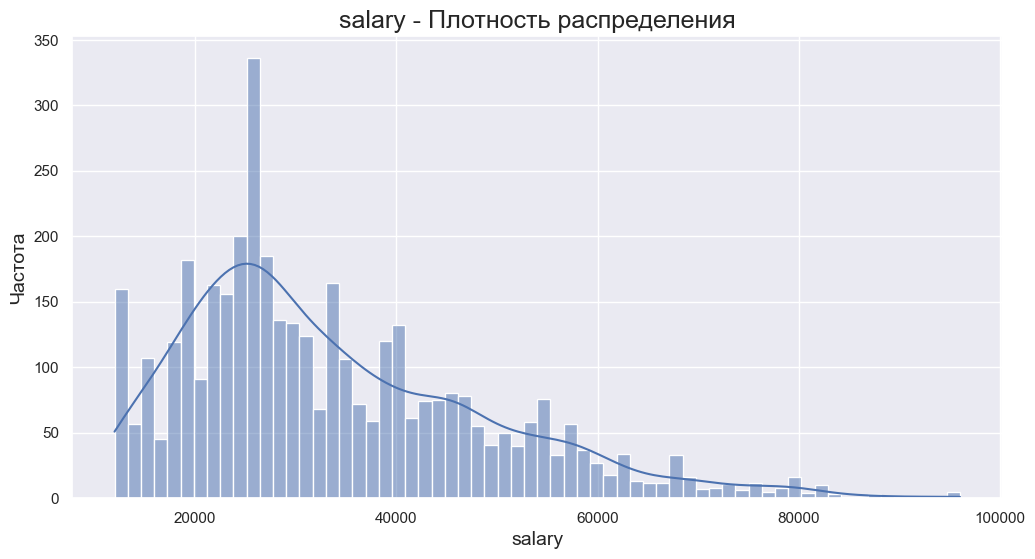

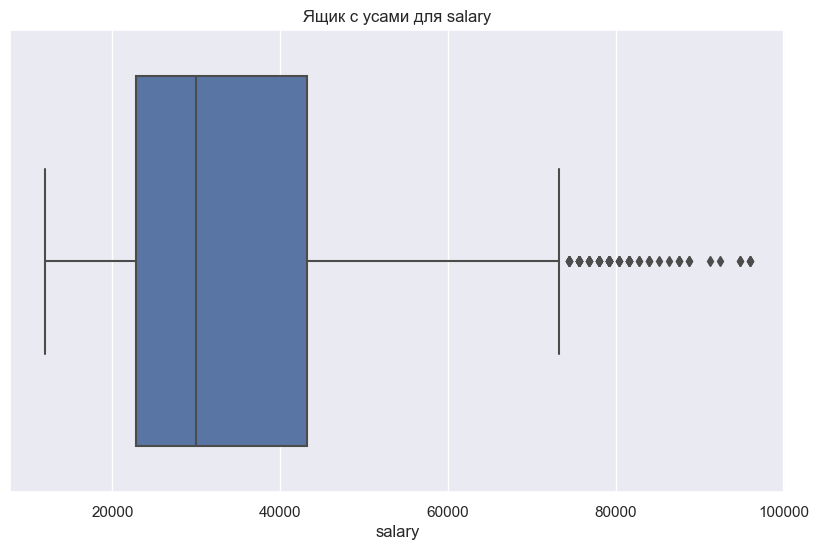

In [ ]:
for num_name in num_col_quit:
    create_histogram(df_train_quit, num_name)
    create_boxplot(df_train_quit, num_name)

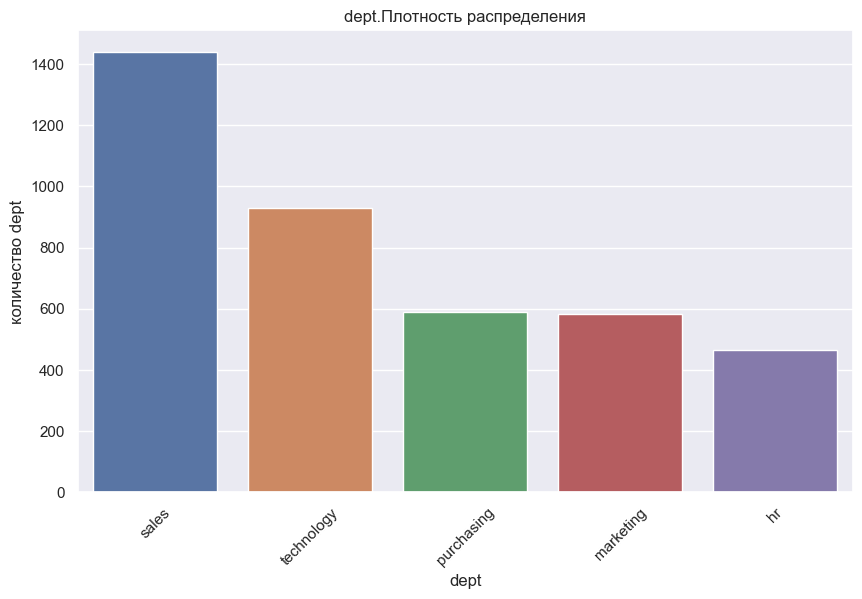

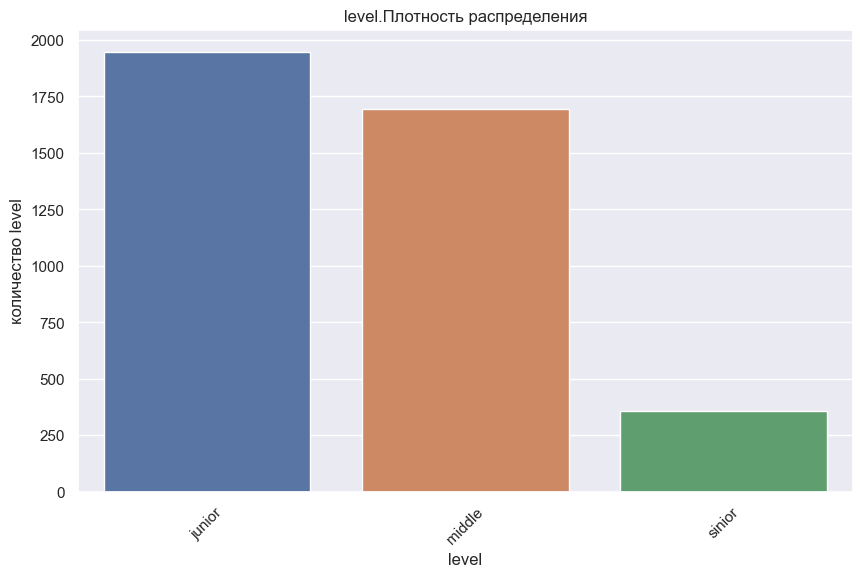

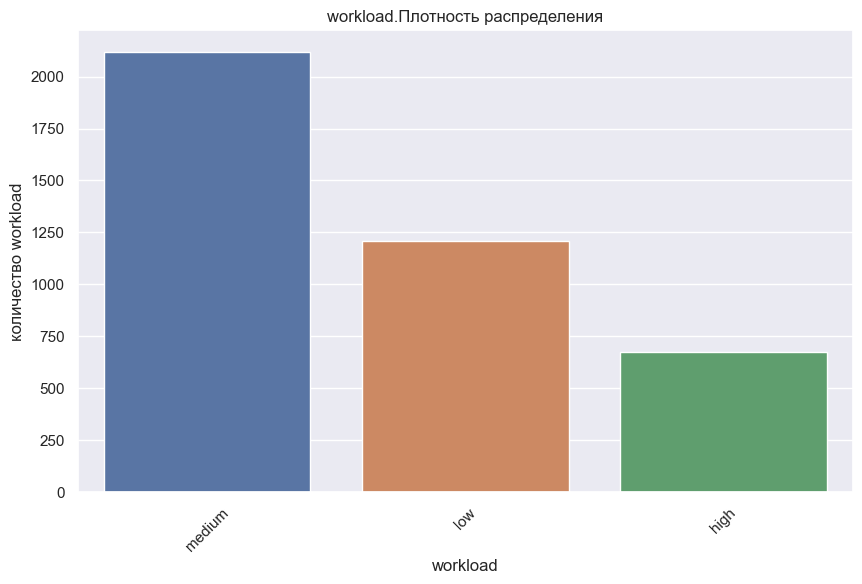

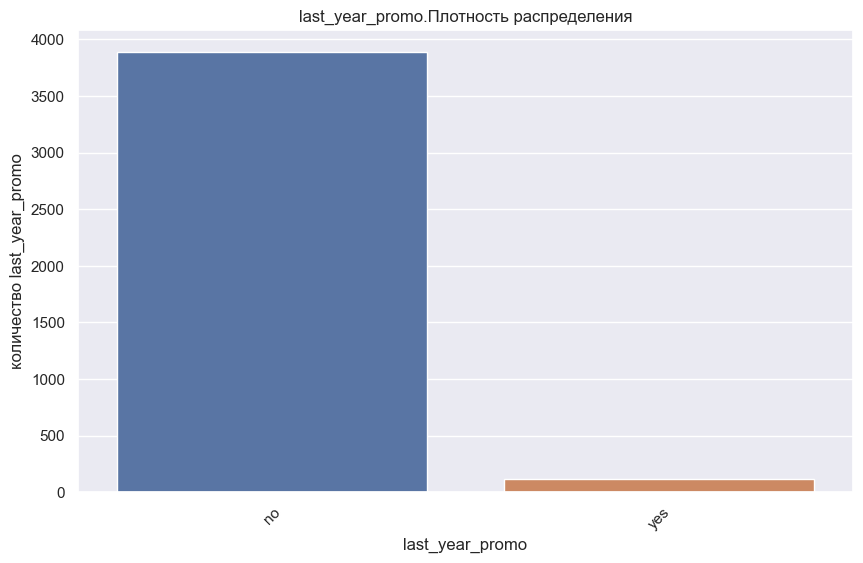

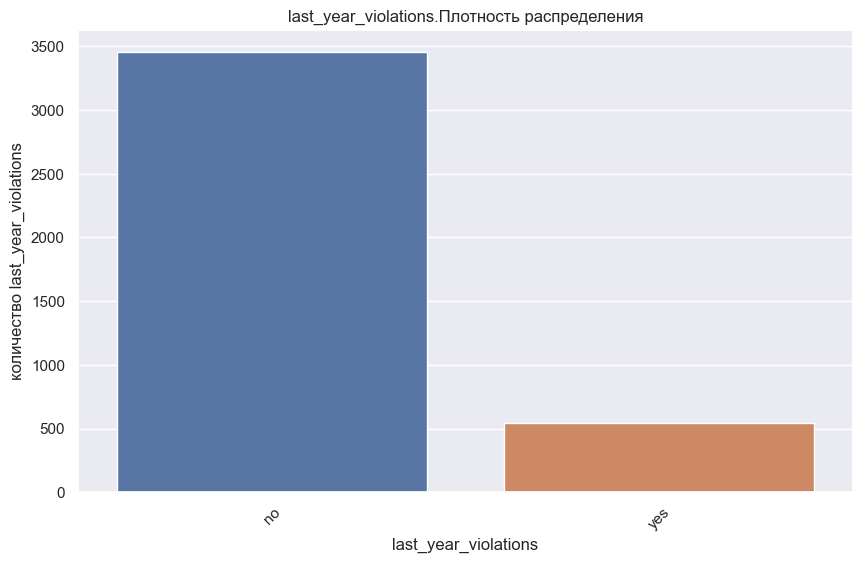

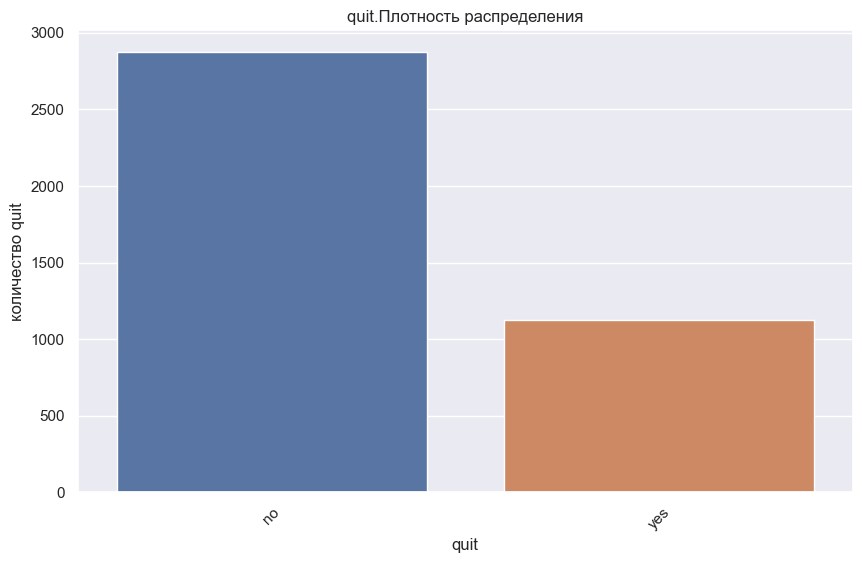

In [ ]:
for cat_name in cat_col_quit:
    create_barplot(df_train_quit, cat_name)

По графикам у нас есть выбросы. Если их убрать - модель может недообучиться, поэтому выбросы оставим и выберем скалер, который устойчив к выбросам. Данные по своим признакам очень похожи на данные из первой задачи

**Портрет уволившегося сотрудника**

Выберем из датафрейма тех, кто уволился и кто нет и посмотрим на графики 

In [ ]:
df_quit_yes = df_train_quit[df_train_quit['quit'] == 'yes']
num_col_quit_yes, cat_col_quit_yes = cat_num_col(df_quit_yes)
df_quit_no = df_train_quit[df_train_quit['quit'] == 'no']

Также проверим среднюю зарплату уволивчшего сотрудника и того, кто остался работать

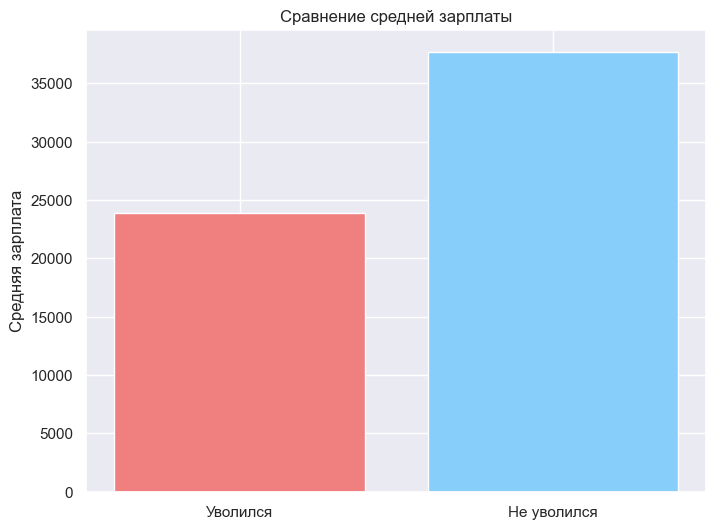

средняя зарплата уволившего сотрудника - 23885
средняя зарплата не уволившегося сотрудника - 37702
она больше на 13817


In [ ]:
# Значения средней зарплаты
quit_yes_mean = round(df_quit_yes['salary'].mean())
quit_no_mean = round(df_quit_no['salary'].mean())

# Построение графика
plt.figure(figsize=(8, 6))
plt.bar(['Уволился', 'Не уволился'], [quit_yes_mean, quit_no_mean], color=['lightcoral', 'lightskyblue'])
plt.title('Сравнение средней зарплаты')
plt.ylabel('Средняя зарплата')
plt.show()

# Вывод информации о разнице в зарплате
print(f"средняя зарплата уволившего сотрудника - {quit_yes_mean}")
print(f"средняя зарплата не уволившегося сотрудника - {quit_no_mean}")
print(f"она больше на {round(quit_no_mean - quit_yes_mean)}")


Таким образом, у сотрудника, который уволился зарплата в среднем больше на 13 тысяч

Изучим среднее время работы сотрудника в фирме 

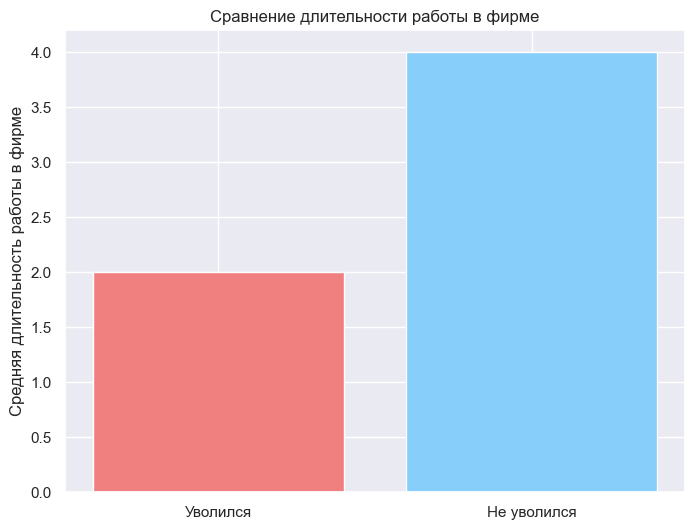

In [ ]:
# Значения количества лет 
employment_years_yes_mean = round(df_quit_yes['employment_years'].mean())
employment_years_no_mean = round(df_quit_no['employment_years'].mean())

# Построение графика
plt.figure(figsize=(8, 6))
plt.bar(['Уволился', 'Не уволился'], [employment_years_yes_mean, employment_years_no_mean], color=['lightcoral', 'lightskyblue'])
plt.title('Сравнение длительности работы в фирме')
plt.ylabel('Средняя длительность работы в фирме')
plt.show()

По графиком видно, что в большнстве случаев увольняются сотрудники, которые проработали около 2х лет 

Сравним отделы сотрудников 

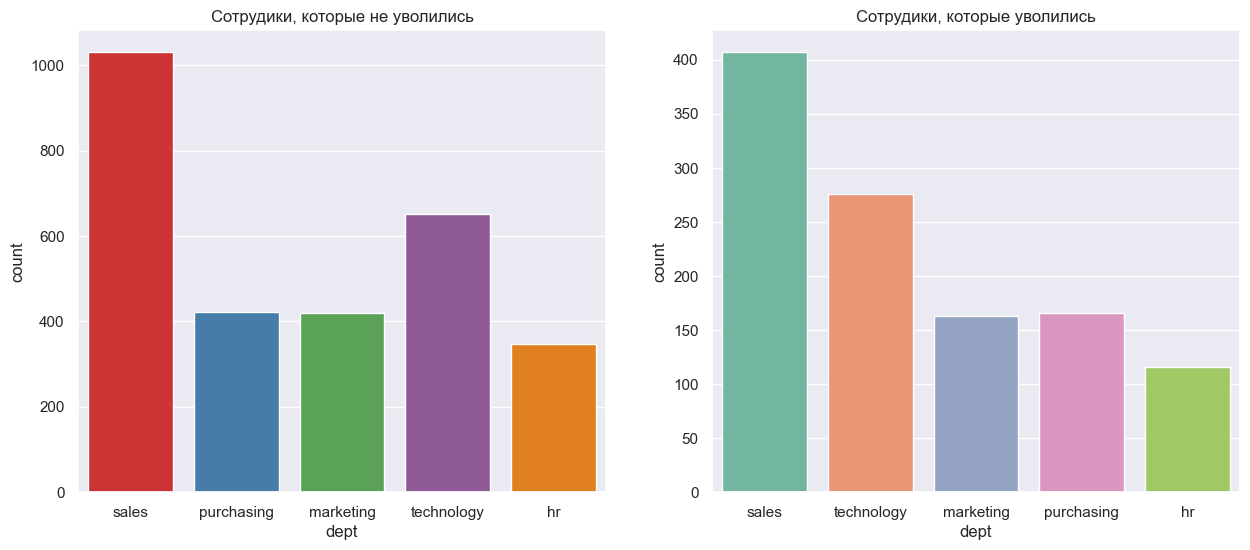

In [ ]:
compare_df(df_quit_no, df_quit_yes, 'dept')

Из графиков видно, что больше всего увольенний (почти треть) в продажах, но там и больше всего сотрудников. Также много сотрудников уволилось в отделе "технологии", там также уволилась треть сотрудников. Меньше всего увольнений в отделе hr. 

Сравним уровни сотрудников

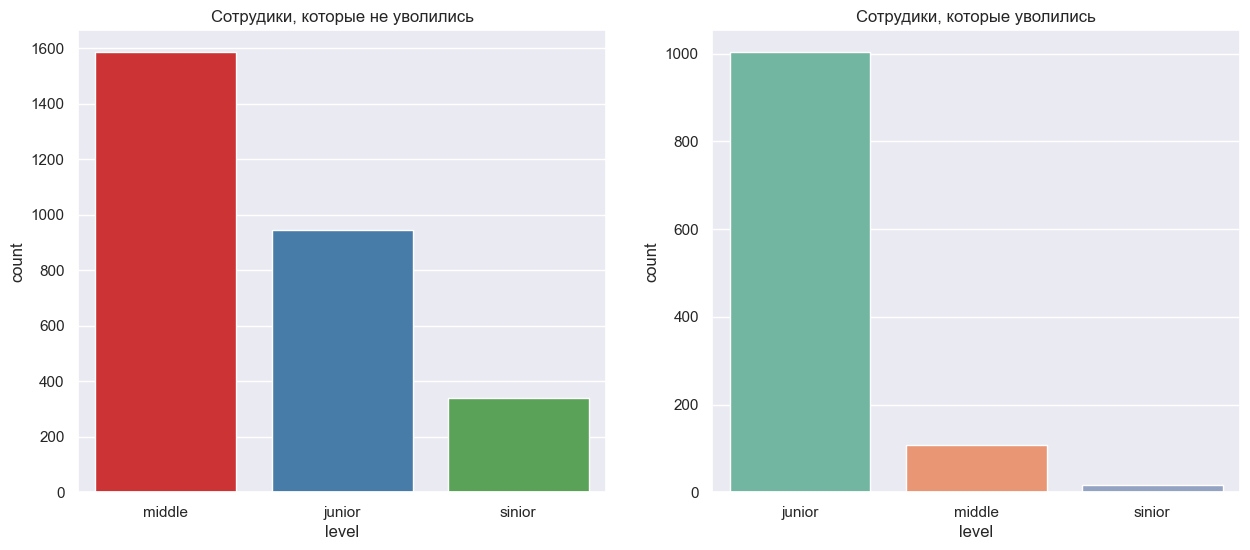

In [ ]:
compare_df(df_quit_no, df_quit_yes, 'level')

Сеньеров, которые остались - меньше всего, но меньше всего среди них и уволилось. А вот половина джуниоров уволилась. Это может быть связано с ожиданиями зарплаты или с тем, что джуны неправильно оценили свои возможности и пошли повышать свою кваллификацию. Мидлов ушло тоже сравнительно мало

Сравним повышение сотрудиков

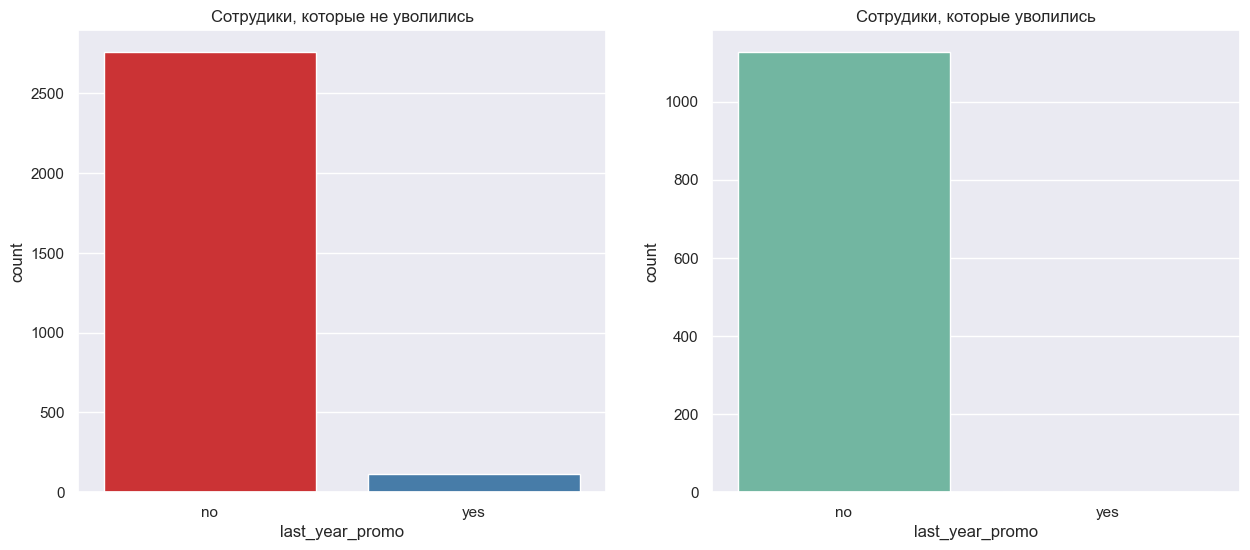

In [ ]:
compare_df(df_quit_no, df_quit_yes, 'last_year_promo')

Сотрудники, которые уволились, остались совсем без повышения 

Сравним нарушение трудового договора 

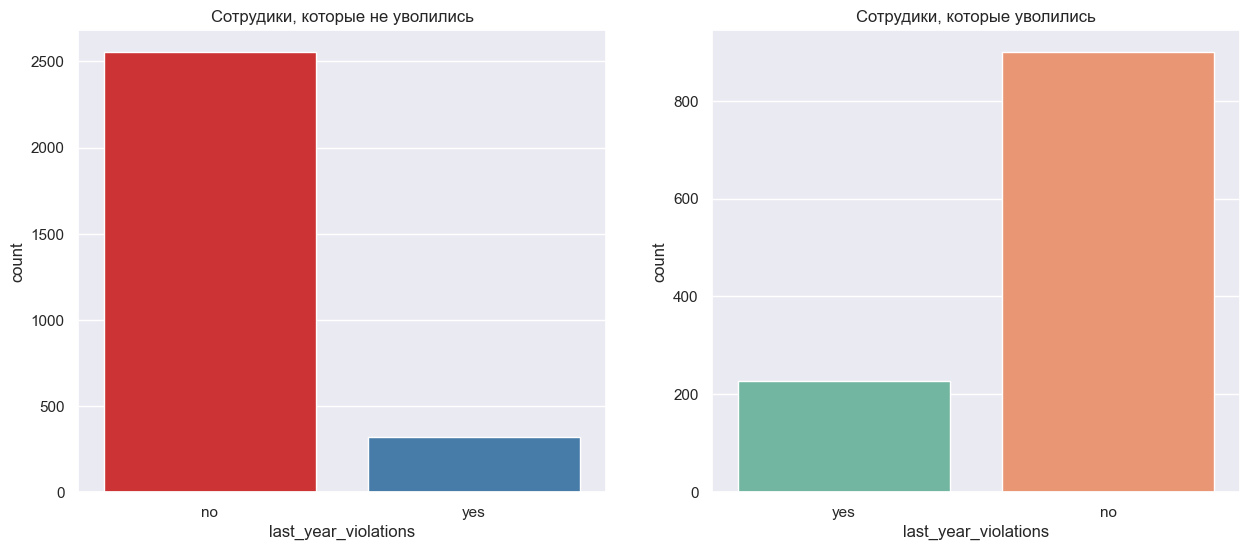

In [ ]:
compare_df(df_quit_no, df_quit_yes, 'last_year_violations')

По графикам видно, что нарушение трудового договроа было и у сотрудников, которые уволились и не уволились. Но у первых процент таких сотрудников больше. 

Проверим нагрузку сотрудников

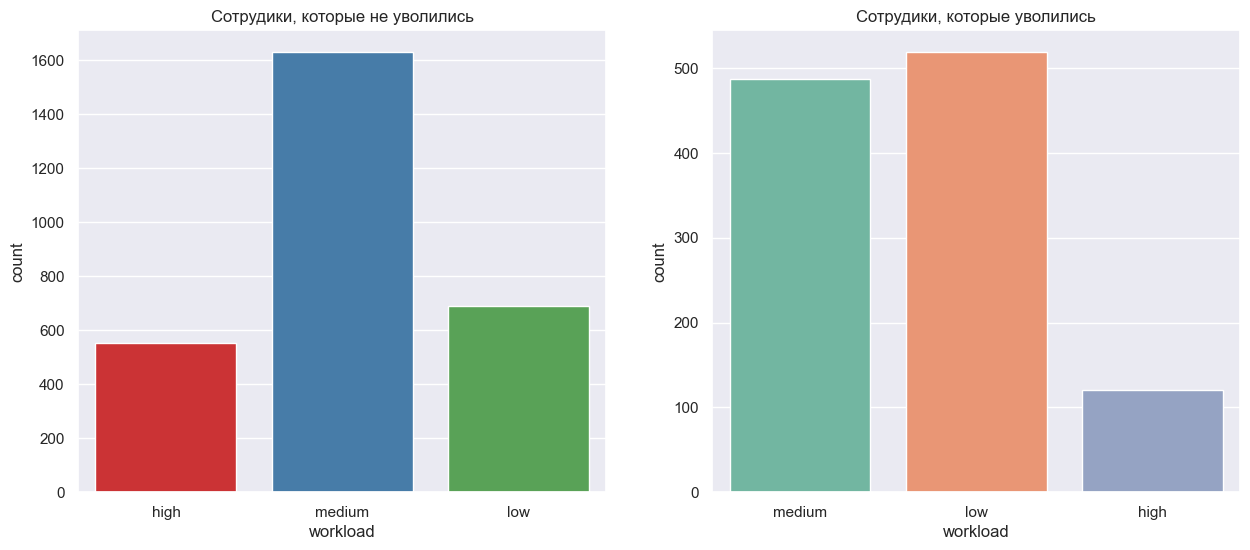

In [ ]:
compare_df(df_quit_no, df_quit_yes, 'workload')

В компании больше всего остались сотрудники со средней загруженностью. И это, в целом, хорощо совпадает с тем, что у большинства уволившихся сотрудников небольшая зарплата и позиция джуна и уволились сотрудники с маленькой загруженностью

#### Вывод
На основании предоставленных данных можно составить следующее описание уволившегося сотрудника:

Уволившийся сотрудник имел среднюю зарплату в размере 23885, что значительно ниже средней зарплаты не уволившихся сотрудников в размере 37702, превышая ее на 13817.

Из анализа графиков видно, что большинство увольнений происходит среди сотрудников, проработавших около двух лет. Более того, наибольшее количество увольнений происходит в отделе продаж и отделе "технологии", где также концентрируется большая часть сотрудников. Наименьшее количество увольнений наблюдается в отделе HR.

Также стоит отметить, что хотя количество сеньеров, оставшихся в компании, является наименьшим, увольнения в этой группе происходят реже. Напротив, половина джуниоров увольняется, что может быть связано как с ожиданиями по заработной плате, так и с желанием улучшить свою квалификацию. Уволившиеся сотрудники не получали повышений.

Также стоит отметить, что нарушение трудового договора наблюдалось как у уволившихся, так и у сотрудников, не уволившихся, однако процент таких случаев среди уволившихся сотрудников выше.

Исходя из данных, можно сделать вывод, что большинство уволившихся сотрудников имеют невысокую заработную плату и занимают позицию джуниора, они также характеризуются меньшей загруженностью.

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Проанализирован портрет уволившегося сотрудника.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Анализ нужно сделать с помощью относительных величин - оперировать абсолютными величинами не всегда удобно, так как в зависимости от масштаба исследования (компания на 100 человек и компания на 100 000 человек, например) результаты могут быть более или менее интерпретируемыми. Для категориальных/дискретных признаков мы можем использовать `value_counts(normalize=True)`, для непрерывных также стоит посчитать и сравнить средние.

Сделаем объединение тестовых датафреймов по id 

In [ ]:
df_test_final = df_test_combined.merge(df_test_quit, on='id')
print(f'количество дубликатов:{df_test_final.duplicated().sum()}')
print()
print(f'количество пропусков:\n{df_test_final.isna().sum()}')
print()
print(f'размерность датафрейма: {df_test_final.shape}')

количество дубликатов:0

количество пропусков:
id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
quit                     0
dtype: int64

размерность датафрейма: (2000, 11)


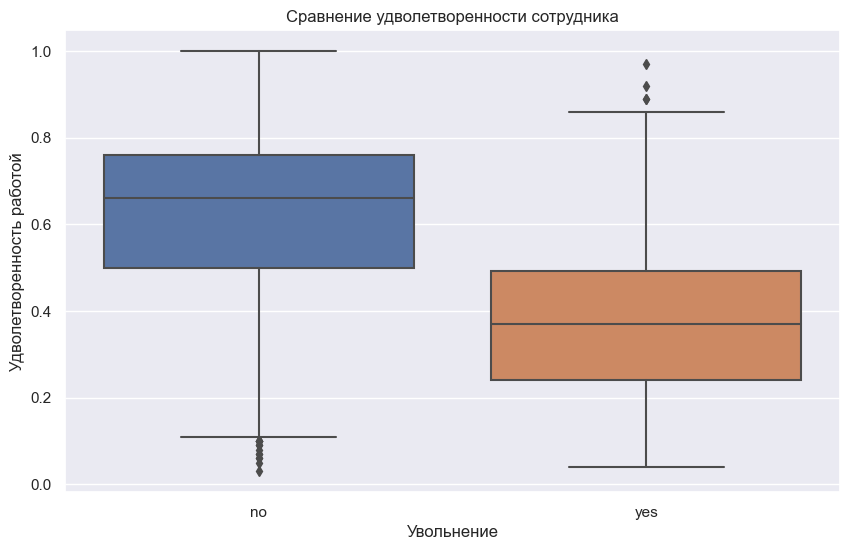

In [ ]:
# Создание боксплота для сравнения распределений
plt.figure(figsize=(10, 6))
sns.boxplot(x='quit', y='job_satisfaction_rate', data=df_test_final)
plt.title('Сравнение удволетворенности сотрудника')
plt.xlabel('Увольнение')
plt.ylabel('Удволетворенность работой')
plt.show()


Сотрудники, которые остались в компании, обычно проявляют большее удовлетворение от работы, чем те, кто уволился. Более того, количество уволившихся сотрудников, которые были полностью удовлетворены своей работой, значительно меньше, и это отражается на графике в виде выбросов. Такая же тенденция наблюдается среди сотрудников, которые остались в компании, но при этом показывают низкий уровень удовлетворения от работы.

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Исследовано распределение удовлетворённости в зависимости от факта ухода.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Чуть более интересным решением, позволяющим выполнить оценку не "на глаз", а более статистически достоверно, было бы использование статистического теста (например, `ttest`) для сравнения распределений в выборках.

# Этап 4. Добавление нового признака

<a id="step_14"></a>

Предположительно уровень удволетворенности сотрудника и увольнение связаны. Если это не так- анализ важности признаков это покажет. 
Чтобы добавить новый признак - предскажем уровень удволетворенности сотрудника и добавим в тренировочные и тестовые данные 

In [ ]:
pred_2 = random_search.predict(df_train_quit)
pred_3 = random_search.predict(df_test_final)
df_train_quit['job_satisfaction_rate'] = pred_2
df_test_final['job_satisfaction_rate'] = pred_3

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Создан новый признак на основе модели из предыдущей задачи.

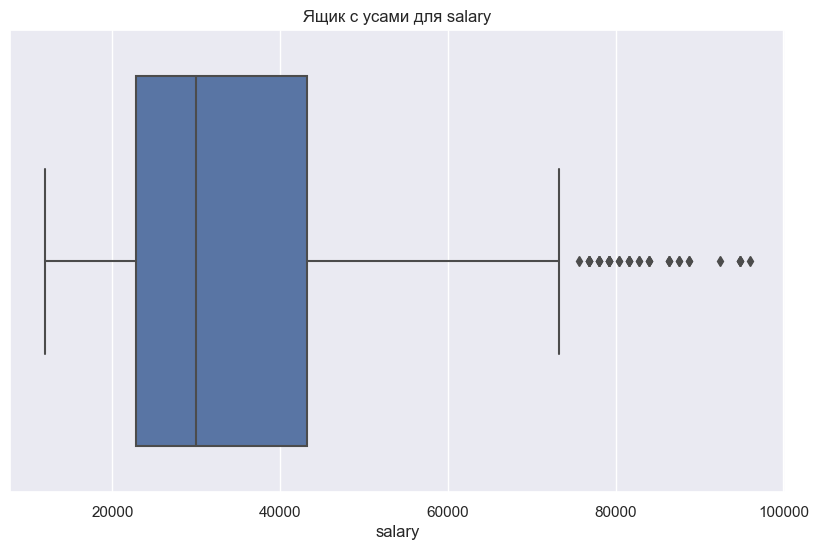

In [ ]:
create_boxplot(df_test_final, 'salary')

# Этап 5. Предобработка данных и построение модели

<a id="step_15"></a>



In [ ]:
# Замена значений 'yes' и 'no' на 1 и 0 в столбце 'quit' датафреймов
# df_train_quit и df_test_final
df_train_quit['quit'] = df_train_quit['quit'].replace({'yes': 1, 'no': 0})
df_test_final['quit'] = df_test_final['quit'].replace({'yes': 1, 'no': 0})

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b> Кодирование нельзя делать руками:
- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью `pipeline`, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров. Для кодирования целевого признака нужно использовать `LabelEncoder` (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [ ]:
# Определение признаков (features) и целевой переменной (target) 
# для обучающего и тестового набора данных 
df_train_quit_features = df_train_quit.drop(['quit'], axis=1)
df_train_quit_target = df_train_quit['quit']

df_test_final_features = df_test_final.drop(['quit'], axis=1)
df_test_final_tagret = df_test_final['quit']

In [ ]:
# определение списков для предобработки 
ohe_cols_2 = ['dept', 'last_year_promo', 'last_year_violations']
ord_cols_2  = ['level', 'workload']
num_cols_2 = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [ ]:
#OneHotEncoder
ohe_pipe_2 = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
])

#OrdinalEncoder
ord_pipe_2 = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[#['junior', 'middle', 'senior'], 
                                       #['low', 'medium', 'high'], 
                                       ['yes', 'no'], 
                                       ['no', 'yes']],
                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
])

#QuantileTransformer
num_pipe_2 = Pipeline(steps=[
    ('quantile', QuantileTransformer())
])

#ColumnTransformer
data_preprocessor_2 = ColumnTransformer(transformers=[
    ('ohe', ohe_pipe_2, ohe_cols_2),
    ('ord', ord_pipe_2, ord_cols_2),
    ('num', num_pipe_2, num_cols_2)
], remainder='passthrough')

#создание основного пайплайна
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor_2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])



В качестве моделей будем использовать DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier

In [ ]:
#определение сетки моделей и гиперпараметров
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
     'models__max_features': range(2,10),
     'models__min_samples_leaf': range(1,10),
     'models__min_samples_split': range(2,20)
    }, 

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [1, 5, 10],
    }, 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [5, 7, 9], 
    }
]

random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE)

random_search.fit(df_train_quit_features, df_train_quit_target)
print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/admin/opt/anaconda3/envs/practicum/lib/python3.9/site-packages/sklearn/preprocessing/_encoder

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['dept']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                               

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Найдена лучшая модель.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации⚠️:</b> Аналогично метрика получена на кросс-валидации, а не на `train`.

In [ ]:
pred_quit = random_search.predict(df_test_final_features)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Давай вспомним, что из себя представляет метрика `AUC-ROC` и подходит ли метод `predict` для её оценки?

In [ ]:
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(df_test_final_tagret, pred_quit)}')
warnings.filterwarnings('ignore')

Метрика ROC-AUC на тестовой выборке: 0.857815247239179


Лучшая модель DecisionTreeClassifier с метрикой ROC-AUC - 0.85. Это плохое значение, поэтому проведем анализ важности признаков и уберем неважные 

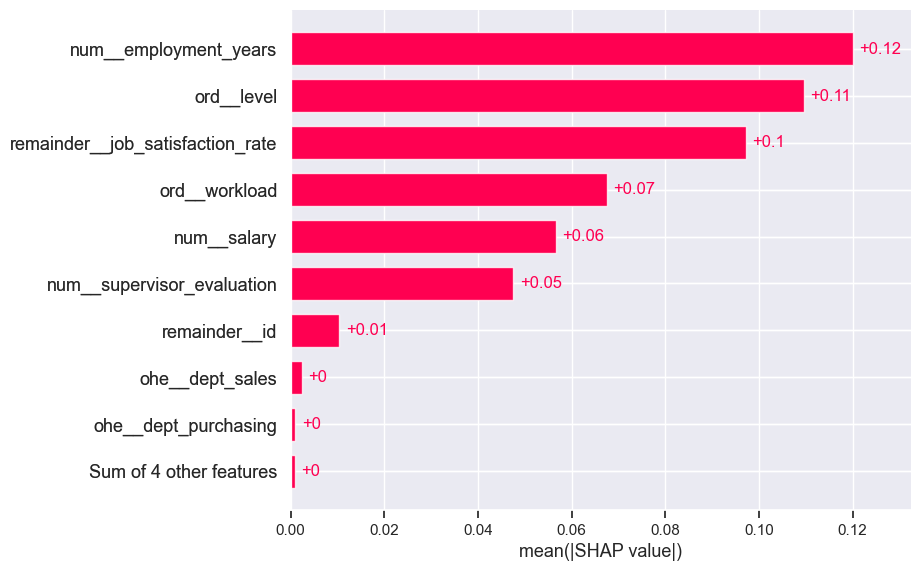

In [ ]:
X_train = pipe_final.named_steps['preprocessor'].fit_transform(df_train_quit_features)
explainer = shap.Explainer(random_search.best_estimator_.named_steps['models'], X_train)

X_test = pipe_final.named_steps['preprocessor'].transform(df_train_quit_features)

feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test = pd.DataFrame(X_test, columns =feature_names)
shap_values = explainer(X_test)

shap.plots.bar(shap_values[:, :, 1])

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Круто, что используешь `SHAP` для анализа важности признаков.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>

Нужно подписать название и ось Y.

Все признаки от supervisor_evaluation и ниже уберем и еще раз обучим модель и подберем гиперпараметры 

In [ ]:
new_columns_for_df = ['employment_years', 'job_satisfaction_rate',
                       'salary', 'level', 'workload']

df_train_quit_features_2 = df_train_quit_features[new_columns_for_df]
df_test_final_features_2 = df_test_final_features[new_columns_for_df]

ord_cols_3 = ['level', 'workload']
num_cols_3 = ['salary', 'job_satisfaction_rate', 'employment_years']


ord_pipe_3 = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'senior'], 
                                       ['low', 'medium', 'high'],
                                       ],
                                         handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(strategy='most_frequent'))
])


num_pipe_3 = Pipeline(steps=[
    ('quantile', RobustScaler())
])

data_preprocessor_3 = ColumnTransformer(transformers=[
    ('ohe', ord_pipe_3, ord_cols_3),
    ('num', num_pipe_3, num_cols_3)
], remainder='passthrough')

# создание основного пайплайна
pipe_final_3 = Pipeline([
    ('preprocessor', data_preprocessor_3),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': (None, *range(2, 11)),
     'models__max_features': range(1,6),
     'models__min_samples_leaf': range(1,10),
     'models__min_samples_split': range(2,20)
    }, 

    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': [1, 5, 10],
    }, 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [5, 7, 9], 
    }
]

random_search = RandomizedSearchCV(
    pipe_final_3,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE)

random_search.fit(df_train_quit_features_2, df_train_quit_target)
print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

pred_quit = random_search.predict_proba(df_test_final_features_2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(df_test_final_tagret, pred_quit)}')

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                 

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Требуемое качество достинуто.

Лучшей метрикой стало дерево решений, как и в певром случае. Наиболее вероятным объяснением того, почему дерево решений показало лучший результат, может быть то, что наш набор данных обладает такими характеристиками, которые делают дерево решений наилучшим выбором для моделирования.

Деревья решений могут хорошо обрабатывать нелинейные отношения между переменными, а также способны автоматически преобразовывать и выбирать признаки для разделения, что может быть полезным в нашем наборе данных.

Гиперпараметры max_depth=9, max_features=5,min_samples_leaf=8,min_samples_split=18 random_state=42

Метрика ROC-AUC на тестовой выборке - 0.92 

<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть вывод по машинному обучению.

# Вывод
**Цель проекта:** Разработать модели машинного обучения для предсказания уровня удовлетворенности сотрудника работой в компании и для прогнозирования факта увольнения сотрудника на основе предоставленных данных заказчика

Длоя этого мы сделали исследовательский анализ данных, увидели выбросы, пропуски. Выбросы трогать не стали, а пропуки заменили на часто встречающеимся значения в обеих задачах. 

Для для предсказания уровня удовлетворенности обработали данные и выбрали лучшую модель из 3: дерево решений, логистическая регрессия и линейная регрессия. Лучшей моделью стало дерево решений. С помощью этой модели мы сделали предсказание уровня удовлетворенности сотрудников и добавили новый признак для выполнения второй задачи, так как предположили, что недовольный сотрудник с большей вероятностью уйдет из компании. Наше предположение подтвердилось при анализе выжности признаков. После этого анализа мы также убрали несколько признаков (отдел, в котором работает сотрудник, уровень загруженности сотрудника, повышение за последний год,  арушал ли сотрудник трудовой договор, оценка качества работы сотрудника, которую дал руководитель ). Для предсказания увольнения сотрудника использовали 3 модели - дерево решений, логистическая регрессия, метод ближайший соседей. Лучшей моделью оказалось дерево решений, как и в первой задаче. 

Теперь у компании есть модель, которая будет предсказывать удволетворенность сотрудника и вероятнсоть их увольнения. Но уже сейчас можно сделать некоторые выводы. Компании стоит обратить внимание на новичков в работе, особенно в отделах - продажи и технологии. Возможно, небольшое повышение зарплаты улучшит их настроение и они подумают подольше задержаться в компании. 


<div class="alert alert-success">
    
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Есть итоговый вывод и рекомендации по сокращению увольнений - отлично!

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту.

Лиза, проект получился на довольно хорошем уровне - отличная работа над проектом, молодец!

Мне нравится твой аналитический подход к выполнению проекта, ты соблюдаешь структуру работы, выполняешь её последовательно - это очень хорошо! Шаги проекта выполнены по порядку согласно плану проекта, нет смысловых и структурных ям. Важно, что не забываешь про выводы.

Работа с моделями также выполнена отлично: исследовано несколько алгоритмов, проведён подбор гиперпараметров с помощью `RandomizedSearchCV`, выполнена промежуточная оценка моделей на кросс-валидации - молодец! Здорово, что используешь сочетание `ColumnTransformer` и `Pipeline` для соединения разных инструментов в единый модельный объект и настраиваешь бесперебойную работу энкодера в случае появления в данных новых, неизвестных на момент обучения значений признаков - так твоё решение будет более гибким и масштабируемым. 
    
Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.
    
Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)
    
Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.
    
Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)
    
Жду твой проект на повторном ревью. До встречи:)